In [1]:
from initials import *



Logging Resourse Usage - before any initializations
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - before any initializations




2024-10-11 11:46:44,499 - p2256 {initials.py:231} - INFO - Check 1
2024-10-11 11:46:44,501 - p2256 {initials.py:242} - INFO - Check 2
2024-10-11 11:46:44,502 - p2256 {initials.py:248} - INFO - Check 3
2024-10-11 11:46:44,558 - p2256 {initials.py:262} - INFO - Choosen Device : cuda:0
2024-10-11 11:46:44,559 - p2256 {initials.py:269} - INFO - Check 4
2024-10-11 11:46:44,559 - p2256 {initials.py:446} - INFO - Check 6
2024-10-11 11:46:44,559 - p2256 {initials.py:550} - INFO - Check 8
2024-10-11 11:46:44,560 - p2256 {initials.py:623} - INFO - Check 9
2024-10-11 11:46:44,560 - p2256 {initials.py:675} - INFO - Check 10




Logging Resourse Usage - after all library initializations
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - after all library initializations


current process name : MainProcess
CPU Count : 16
GPU 0: 0 MiB / 6144 MiB
Choosen Device : cuda:0


Logging Resourse Usage - end of initials.py
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - end of initials.py




In [4]:
pd.DataFrame(mongodb["projects"].find())

,_id,project_id,user_id,project_name,project_type,project_dir,project_creation_time,project_creation_time_str
0,99782a7a-bc27-487f-b472-275724bbfa80_cddc7182,cddc7182,99782a7a-bc27-487f-b472-275724bbfa80,Test Project,Image Classification,workdir\99782a7a-bc27-487f-b472-275724bbfa80\T...,2024-09-24 13:08:12.240,2024-09-24 01:08:12 PM
1,99782a7a-bc27-487f-b472-275724bbfa80_5b9ce442,5b9ce442,99782a7a-bc27-487f-b472-275724bbfa80,Test OD Project,Object Detection,workdir\99782a7a-bc27-487f-b472-275724bbfa80\T...,2024-10-02 12:15:49.481,2024-10-02 12:15:49 PM
2,99782a7a-bc27-487f-b472-275724bbfa80_0581fad0,0581fad0,99782a7a-bc27-487f-b472-275724bbfa80,Project 2,Image Classification,workdir\99782a7a-bc27-487f-b472-275724bbfa80\P...,2024-10-02 19:38:46.747,2024-10-02 07:38:46 PM
3,99782a7a-bc27-487f-b472-275724bbfa80_2e62b30a,2e62b30a,99782a7a-bc27-487f-b472-275724bbfa80,KITTI-Test,Object Detection,workdir\99782a7a-bc27-487f-b472-275724bbfa80\K...,2024-10-11 11:50:41.013,2024-10-11 11:50:41 AM
4,99782a7a-bc27-487f-b472-275724bbfa80_44770989,44770989,99782a7a-bc27-487f-b472-275724bbfa80,CIFAR10-TEST,Image Classification,workdir\99782a7a-bc27-487f-b472-275724bbfa80\C...,2024-10-11 11:52:33.379,2024-10-11 11:52:33 AM


In [5]:
pd.DataFrame(mongodb['run_records'].find({"project_name" : "CIFAR10-TEST"}))

,_id,training_start_time,training_start_time_str,run_name,train_data_name,val_data_name,project_name,user_id,model_family,model_name,training_mode,batch_size,num_epochs,learning_rate,model_path,training_status
0,97d46a51-afe0-42b1-81f1-2cb4ad784297,2024-10-11 11:55:24.657,2024-10-11 11:55:24 AM,Training-1,CIFAR10-Train,CIFAR10-Val,CIFAR10-TEST,99782a7a-bc27-487f-b472-275724bbfa80,ResNet,resnet50,finetune,32,20,0.001,workdir\99782a7a-bc27-487f-b472-275724bbfa80\C...,"Epoch 1/20, Estimated time : 0:0 min"


In [7]:
pd.DataFrame(mongodb['training_history'].find({"project_name" : "KITTI-Test", "run_name" : "RUN2"}))

,_id,run_name,run_dir,project_name,project_type,train_data_name,val_data_name,user_id,model_path,history,classification_report
0,6708d16ce817fbc3ef1f1044,RUN2,workdir\99782a7a-bc27-487f-b472-275724bbfa80\K...,KITTI-Test,Object Detection,KITTI-Train,KITTI-Val,99782a7a-bc27-487f-b472-275724bbfa80,workdir\99782a7a-bc27-487f-b472-275724bbfa80\K...,"{'epochs': ['1/10'], 'box_loss': ['1.3848'], '...",Will available after training!


In [8]:
mongodb["projects"].delete_many({})

In [11]:
import requests

# Set the URL of the API
url = 'http://localhost:5000/create-project'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name': 'Test Project',
    'project_type': 'Image Classification'  # You can change this according to your test case
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.json())

Status Code: 200
Response JSON: {'status': 'fail', 'message': 'Project name already exists!'}


In [12]:
import requests

# Set the URL of the API
url = 'http://localhost:5000/get-project-list'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com'
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.json())

Status Code: 200
Response JSON: {'status': 'success', 'project_list': [{'_id': '99782a7a-bc27-487f-b472-275724bbfa80_cddc7182', 'project_id': 'cddc7182', 'user_id': '99782a7a-bc27-487f-b472-275724bbfa80', 'project_name': 'Test Project', 'project_type': 'Image Classification', 'project_dir': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project', 'project_creation_time': '2024-09-24 13:08:12.240000', 'project_creation_time_str': '2024-09-24 01:08:12 PM'}]}


In [ ]:

        email = request.form['email']         
        project_name = request.form['project_name']
        data_name =  request.form['data_name']
        data_type = request.form['data_type']
        data_drive_id = request.form['data_drive_id']
        data_zip_file = request.files['data_zip_file']
        

In [52]:
import requests
# Set the URL of the API
url = 'http://localhost:5000/upload-data'  # Replace with the actual URL of your API
# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name' : 'Test Project',
    'data_name' : 'Test Data 1',
    'data_type' : "Labeled",
    'data_drive_id' : "1TvlMyCitAOOrAwpllcnM1gdi0bAJgXKr", 
    'data_zip_file' : ""
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.content.decode())

Status Code: 200
Response JSON: {"status":"success","data":{"_id":"99782a7a-bc27-487f-b472-275724bbfa80_Test Project_b2a2d49e","data_id":"b2a2d49e","project_name":"Test Project","user_id":"99782a7a-bc27-487f-b472-275724bbfa80","data_name":"Test Data 1","data_type":"Labeled","project_type":"Image Classification","data_zip_path":"workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_b2a2d49e.zip","data_extracted_path":"workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_b2a2d49e_extracted","data_creation_time":"2024-09-24 22:13:35.359280","data_creation_time_str":"2024-09-24 10:13:35 PM"}}


In [51]:
mongodb["datasets"].delete_many({})

In [48]:
import requests
# Set the URL of the API
url = 'http://localhost:5000/get-dataset-list'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name' : 'Test Project'
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.content.decode())

Status Code: 200
Response JSON: {"status":"success","dataset_list":[{"_id":"99782a7a-bc27-487f-b472-275724bbfa80_Test Project_9cbf3d39","data_id":"9cbf3d39","project_name":"Test Project","user_id":"99782a7a-bc27-487f-b472-275724bbfa80","data_name":"Test Data","data_type":"Labeled","project_type":"Image Classification","data_zip_path":"workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_9cbf3d39.zip","data_extracted_path":"workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_9cbf3d39_extracted","data_creation_time":"2024-09-24 21:35:56.613000","data_creation_time_str":"2024-09-24 09:35:56 PM"}]}


In [19]:
data_drive_id = "1aGEFw_C5UVJbpWO28fNWlDlWRo5LGiW5"
data_id = uuid.uuid4().__str__()[:8]
file_url = f'https://drive.google.com/uc?id={data_drive_id}'
data_dest_file = os.path.join(f"data_{data_id}.zip")

gdown.download(file_url, data_dest_file)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1aGEFw_C5UVJbpWO28fNWlDlWRo5LGiW5 



In [45]:
data_dest_file = os.path.join('workdir', '99782a7a-bc27-487f-b472-275724bbfa80', 'Test Project', 'data_15daf170.zip')
data_drive_id = "1aGEFw_C5UVJbpWO28fNWlDlWRo5LGiW5"
dest_dir = os.path.dirname(data_dest_file)
file_name = os.path.basename(data_dest_file)
current_dir = os.getcwd()
os.chdir(dest_dir)
os.system(f"gdown --output {file_name} {data_drive_id}")
os.chdir(current_dir)

In [41]:
import requests
# Set the URL of the API
url = 'http://localhost:5000/get-run-logs'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name' : 'Test Project'
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.content.decode())

Status Code: 200
Response JSON: {"status":"success","run_history":[{"_id":"665cb16a-09e1-4075-ab2a-4af356f72484","training_start_time":"2024-09-28 20:44:39.488000","training_start_time_str":"2024-09-28 08:44:39 PM","run_name":"RUN1","data_name":"Test Data 2","project_name":"Test Project","user_id":"99782a7a-bc27-487f-b472-275724bbfa80","arch_name":"resnet18","training_mode":"scratch","batch_size":32,"num_epochs":3,"learning_rate":0.01,"training_status":"Epoch 2/3"}]}


In [220]:
import requests
# Set the URL of the API
url = 'http://localhost:5000/get_detailed_training_history'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name' : 'Test Project',
    'run_name' : "RUN5"
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.content.decode())

Status Code: 200
Response JSON: {"status":"success","history":{"epochs":["1/10","2/10","3/10","4/10","5/10","6/10","7/10","8/10","9/10","10/10"],"train_loss":[1.6870661981964112,0.987868053894043,0.6708380421638489,0.5069681361818313,0.37738567874908446,0.2667492274570465,0.18609078111648558,0.13428197086185217,0.10665805390235036,0.09225440960817038],"train_acc":[0.37302,0.64982,0.76554,0.8247,0.86814,0.90678,0.93532,0.95356,0.96388,0.96834],"val_loss":[1.2545855006217956,0.8299936250448227,0.6535747511148453,0.7166092813909054,0.6032534539937973,0.5724539531826973,0.6398337110929191,0.6688346846431493,0.7417796985477209,0.7742234165892005],"val_acc":[0.5425,0.713,0.7768,0.7596,0.7986,0.8216,0.8177,0.8255,0.8167,0.8227]},"classification_report":{"class_name":["bird","car","cat","deer","dog","frog","horse","plane","ship","truck","Class Average","Overall"],"n_sample":[1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,10000.0],"TP":[742,932,826,863,620,842,751,

In [221]:
pd.DataFrame(json.loads(response.content.decode())["history"])

,epochs,train_loss,train_acc,val_loss,val_acc
0,1/10,1.687066,0.37302,1.254586,0.5425
1,2/10,0.987868,0.64982,0.829994,0.7130
2,3/10,0.670838,0.76554,0.653575,0.7768
3,4/10,0.506968,0.82470,0.716609,0.7596
4,5/10,0.377386,0.86814,0.603253,0.7986
5,6/10,0.266749,0.90678,0.572454,0.8216
6,7/10,0.186091,0.93532,0.639834,0.8177
7,8/10,0.134282,0.95356,0.668835,0.8255
8,9/10,0.106658,0.96388,0.741780,0.8167
9,10/10,0.092254,0.96834,0.774223,0.8227


In [222]:
pd.DataFrame(json.loads(response.content.decode())["classification_report"])

,class_name,n_sample,TP,FP,FN,Precision,Recall,Accuracy
0,bird,1000.0,742,173,258,0.81,0.74,0.74
1,car,1000.0,932,76,68,0.92,0.93,0.93
2,cat,1000.0,826,617,174,0.57,0.83,0.83
3,deer,1000.0,863,323,137,0.73,0.86,0.86
4,dog,1000.0,620,131,380,0.83,0.62,0.62
5,frog,1000.0,842,101,158,0.89,0.84,0.84
6,horse,1000.0,751,37,249,0.95,0.75,0.75
7,plane,1000.0,816,88,184,0.9,0.82,0.82
8,ship,1000.0,920,97,80,0.9,0.92,0.92
9,truck,1000.0,915,130,85,0.88,0.92,0.92


In [163]:
import pandas as pd

# Classification report string (replace with actual string)
classification_report_str = '''
              precision    recall  f1-score   support

        bird       0.00      0.00      0.00      1000
         car       0.53      0.01      0.02      1000
         cat       0.10      0.76      0.17      1000
        deer       0.00      0.00      0.00      1000
         dog       0.09      0.05      0.06      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
       plane       0.00      0.00      0.00      1000
        ship       0.10      0.18      0.13      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.08      0.10      0.04     10000
weighted avg       0.08      0.10      0.04     10000
'''

# Split the string into lines and filter out empty lines
lines = [line.strip() for line in classification_report_str.strip().split('\n') if line.strip()]

# Initialize an empty list to hold the rows
data = []

# Extract columns (precision, recall, f1-score, support)
for line in lines[1:-3]:  # Skip header and summary stats
    parts = line.split()
    class_name = ' '.join(parts[:-4])  # Handle class names with spaces (if any)
    precision, recall, f1_score, support = map(float, parts[-4:])
    data.append({
        'class': class_name,
        'precision': precision,
        'recall': recall,
        'f1-score': f1_score,
        'support': int(support)
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate total number of samples
df['Number of Samples'] = df['support']

# Calculate overall accuracy (weighted by the number of samples)
overall_accuracy = (df['recall'] * df['support']).sum() / df['support'].sum()

# Class average accuracy (simple average of recall values for all classes)
class_average_accuracy = df['recall'].mean()

# Add the overall and class average rows
df.loc[len(df)] = ['Overall', '', '', '', '', overall_accuracy]
df.loc[len(df)] = ['Class Average', df['precision'].mean(), df['recall'].mean(), df['f1-score'].mean(), '', '']

print(df)


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [168]:

y_true = [0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0]  # True labels
y_pred = [0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]  # Predicted labels
class_names = ['cat', 'dog', 'bird']  # Class names
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [170]:
np.mean(y_true == y_pred)

0.75

In [196]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def classification_report_df(y_true, y_pred, class_names):
    # Get confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_names))))
    
    # Initialize data storage for each class
    report_data = []
    
    # Loop through each class and calculate TP, FP, FN, precision, recall, and accuracy
    for idx, class_name in enumerate(class_names):
        TP = cm[idx, idx]  # True Positives
        FP = cm[:, idx].sum() - TP  # False Positives
        FN = cm[idx, :].sum() - TP  # False Negatives
        TN = cm.sum() - (TP + FP + FN)  # True Negatives
        n_samples = TP + FN  # Number of actual samples for this class
        
        # Calculate precision, recall, and accuracy
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        accuracy = TP / n_samples if n_samples > 0 else 0
        
        # Append to report data
        report_data.append({
            'class_name': class_name,
            'n_sample': n_samples,
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'Precision': precision,
            'Recall': recall,
            'Accuracy': accuracy
        })
    
    # Create a DataFrame from the report data
    df = pd.DataFrame(report_data).round(2)
    
    # Calculate the weighted average (overall) accuracy
    overall_accuracy = round((df['TP'].sum() / df['n_sample'].sum()), 2)
    
    # Calculate class average for precision, recall, accuracy
    class_avg_precision = round(df['Precision'].mean(), 2)
    class_avg_recall = round(df['Recall'].mean(), 2)
    class_avg_accuracy = round(df['Accuracy'].mean(), 2)


    total_samples = df["n_sample"].sum()
    avg_samples = round(df["n_sample"].mean(), 2)
    
    # Add Class Average and Overall rows
    df.loc[len(df)] = ['Class Average', avg_samples, 'NA', 'NA', 'NA', class_avg_precision, class_avg_recall, class_avg_accuracy]
    df.loc[len(df)] = ['Overall', total_samples, 'NA', 'NA', 'NA', 'NA', 'NA', overall_accuracy]
    
    return df

# Example of usage:
# y_true and y_pred would be your ground truth labels and predictions
y_true = [0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0]  # True labels
y_pred = [0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]  # Predicted labels
class_names = ['cat', 'dog', 'bird']  # Class names

# Generate the classification report
report_df = classification_report_df(y_true, y_pred, class_names)

# Show the result
print(report_df)


      class_name  n_sample  TP  FP  FN Precision Recall  Accuracy
0            cat      8.00   8   3   0      0.73    1.0      1.00
1            dog      5.00   3   1   2      0.75    0.6      0.60
2           bird      3.00   1   0   2       1.0   0.33      0.33
3  Class Average      5.33  NA  NA  NA      0.83   0.64      0.64
4        Overall     16.00  NA  NA  NA        NA     NA      0.75


In [197]:
report_df

,class_name,n_sample,TP,FP,FN,Precision,Recall,Accuracy
0,cat,8.00,8,3,0,0.73,1.0,1.00
1,dog,5.00,3,1,2,0.75,0.6,0.60
2,bird,3.00,1,0,2,1.0,0.33,0.33
3,Class Average,5.33,NA,NA,NA,0.83,0.64,0.64
4,Overall,16.00,NA,NA,NA,NA,NA,0.75


In [199]:
report_df.to_dict(orient="split")

{'index': [0, 1, 2, 3, 4],
 'columns': ['class_name',
  'n_sample',
  'TP',
  'FP',
  'FN',
  'Precision',
  'Recall',
  'Accuracy'],
 'data': [['cat', 8.0, 8, 3, 0, 0.73, 1.0, 1.0],
  ['dog', 5.0, 3, 1, 2, 0.75, 0.6, 0.6],
  ['bird', 3.0, 1, 0, 2, 1.0, 0.33, 0.33],
  ['Class Average', 5.33, 'NA', 'NA', 'NA', 0.83, 0.64, 0.64],
  ['Overall', 16.0, 'NA', 'NA', 'NA', 'NA', 'NA', 0.75]]}

In [207]:
classification_report = {}
for col in report_df.columns:
    classification_report[col] = report_df[col].tolist()

In [208]:
classification_report

{'class_name': ['cat', 'dog', 'bird', 'Class Average', 'Overall'],
 'n_sample': [8.0, 5.0, 3.0, 5.33, 16.0],
 'TP': [8, 3, 1, 'NA', 'NA'],
 'FP': [3, 1, 0, 'NA', 'NA'],
 'FN': [0, 2, 2, 'NA', 'NA'],
 'Precision': [0.73, 0.75, 1.0, 0.83, 'NA'],
 'Recall': [1.0, 0.6, 0.33, 0.64, 'NA'],
 'Accuracy': [1.0, 0.6, 0.33, 0.64, 0.75]}

In [37]:
email = 'sachin@gmail.com'
project_name = 'Test Project'

user_data = mongodb['users'].find_one({'email' : email})
user_id = user_data["_id"]

run_history = mongodb["run_records"].find({'user_id' : user_id, 'project_name' : project_name})


In [38]:
pd.DataFrame(run_history)

""


In [35]:
run_name = "RUN1"
train_hist = mongodb["training_history"].find_one({"run_name" : run_name, "project_name" : project_name, "user_id" : user_id})

history = train_hist["history"]
classification_report = train_hist["classification_report"]


TypeError: 'NoneType' object is not subscriptable

In [36]:
train_hist

In [25]:
history

{'epochs': ['1/10', '2/10', '3/10'],
 'train_loss': [1.7407714839935302, 1.0161447722816468, 0.7228593872404099],
 'train_acc': [0.36514, 0.63742, 0.74882],
 'val_loss': [1.2477927943229676, 0.973458186674118, 0.6714399291932582],
 'val_acc': [0.534, 0.6557, 0.7659]}

In [26]:
classification_report

'Will available after training!'

In [34]:
mongodb["training_history"].delete_many({})

In [43]:
email = 'sachin@gmail.com'
project_name = 'Test Project'
dataset_list = list(mongodb["datasets"].find({'user_id' : user_id, 'project_name' : project_name}))

In [44]:
dataset_list

[{'_id': '99782a7a-bc27-487f-b472-275724bbfa80_Test Project_b2a2d49e',
  'data_id': 'b2a2d49e',
  'project_name': 'Test Project',
  'user_id': '99782a7a-bc27-487f-b472-275724bbfa80',
  'data_name': 'Test Data 1',
  'data_type': 'Labeled',
  'project_type': 'Image Classification',
  'data_zip_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_b2a2d49e.zip',
  'data_extracted_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_b2a2d49e_extracted',
  'data_creation_time': datetime.datetime(2024, 9, 24, 22, 13, 35, 359000),
  'data_creation_time_str': '2024-09-24 10:13:35 PM'},
 {'_id': '99782a7a-bc27-487f-b472-275724bbfa80_Test Project_8dc2a4ec',
  'data_id': '8dc2a4ec',
  'project_name': 'Test Project',
  'user_id': '99782a7a-bc27-487f-b472-275724bbfa80',
  'data_name': 'Test Data 2',
  'data_type': 'Labeled',
  'project_type': 'Image Classification',
  'data_zip_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_8dc2a4e

In [45]:
data_name = "Test Data 2"
data_info = mongodb["datasets"].find_one({'user_id' : user_id, 'project_name' : project_name, "data_name" : data_name})

In [46]:
data_info

{'_id': '99782a7a-bc27-487f-b472-275724bbfa80_Test Project_8dc2a4ec',
 'data_id': '8dc2a4ec',
 'project_name': 'Test Project',
 'user_id': '99782a7a-bc27-487f-b472-275724bbfa80',
 'data_name': 'Test Data 2',
 'data_type': 'Labeled',
 'project_type': 'Image Classification',
 'data_zip_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_8dc2a4ec.zip',
 'data_extracted_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_8dc2a4ec_extracted',
 'data_creation_time': datetime.datetime(2024, 9, 27, 10, 26, 15, 572000),
 'data_creation_time_str': '2024-09-27 10:26:15 AM'}

In [49]:
os.listdir(data_info["data_extracted_path"])

['train', 'val']

In [56]:
train_dir = os.path.join(data_info["data_extracted_path"], "train")
val_dir = os.path.join(data_info["data_extracted_path"], "val")

assert os.listdir(train_dir) == os.listdir(val_dir)

In [58]:
class_list = os.listdir(train_dir) 

In [129]:
train_total_samples = 0
train_sample_dist = {}
train_sample_paths = {}
for class_name in class_list:
    train_sample_paths[class_name] = [os.path.join(train_dir, class_name, x) for x in os.listdir(os.path.join(train_dir, class_name))]
    train_sample_dist[class_name] = len(train_sample_paths[class_name])
    train_total_samples += train_sample_dist[class_name]
    
val_total_samples = 0
val_sample_dist = {}
val_sample_paths = {}
for class_name in class_list:
    val_sample_paths[class_name] = [os.path.join(val_dir, class_name, x) for x in os.listdir(os.path.join(val_dir, class_name))]
    val_sample_dist[class_name] = len(val_sample_paths[class_name])
    val_total_samples += val_sample_dist[class_name]


In [98]:
train_sample_dist

{'bird': 5000,
 'car': 5000,
 'cat': 5000,
 'deer': 5000,
 'dog': 5000,
 'frog': 5000,
 'horse': 5000,
 'plane': 5000,
 'ship': 5000,
 'truck': 5000}

In [101]:
train_dist =  np.array(list(train_sample_dist.values()))
normalized_entropy(train_dist)

100

In [130]:
val_dist =  np.array(list(val_sample_dist.values()))
normalized_entropy(val_dist)

100

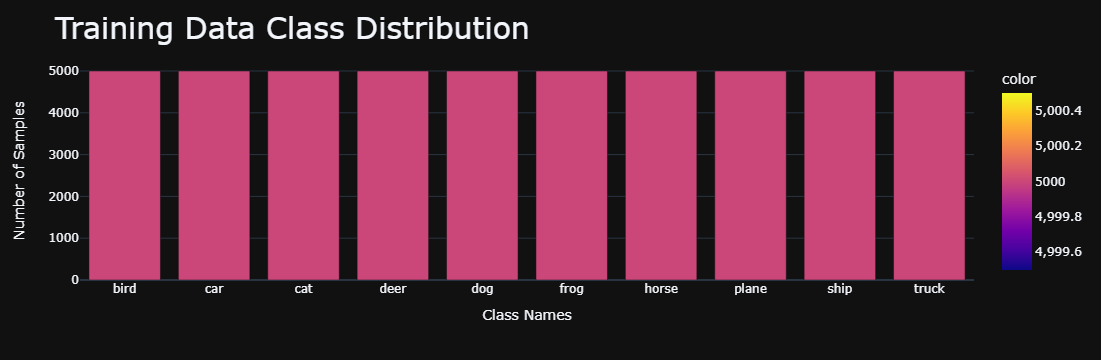

In [128]:

fig = px.bar(x=list(train_sample_dist.keys()), y=list(train_sample_dist.values()),  
             color=list(train_sample_dist.values()))

fig.update_layout(template='plotly_dark',
                    title={'text': f'Training Data Class Distribution', 'font': {'size': 30}, "x" : 0.05, "y" : 0.95}, 
                    yaxis_title=f'Number of Samples', 
                    xaxis_title=f'Class Names')

fig.update_traces(hovertemplate='<b>Number of Samples:</b> %{y}<extra></extra>')

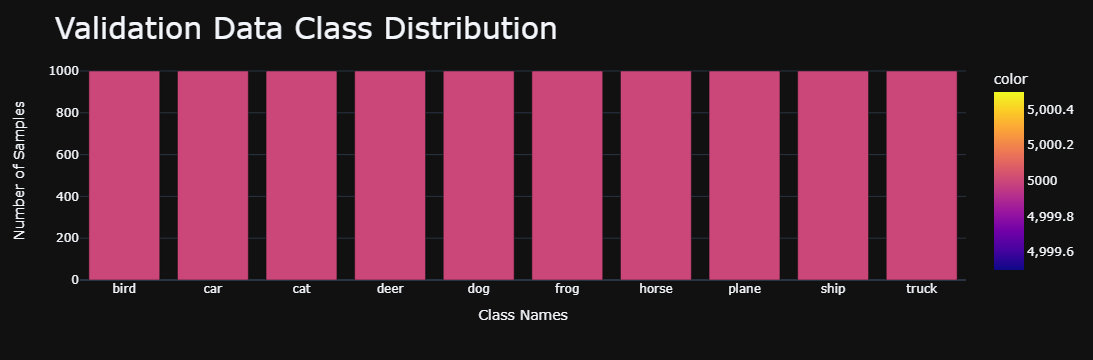

In [131]:

fig = px.bar(x=list(val_sample_dist.keys()), y=list(val_sample_dist.values()),  
             color=list(train_sample_dist.values()))

fig.update_layout(template='plotly_dark',
                    title={'text': f'Validation Data Class Distribution', 'font': {'size': 30}, "x" : 0.05, "y" : 0.95}, 
                    yaxis_title=f'Number of Samples', 
                    xaxis_title=f'Class Names')

fig.update_traces(hovertemplate='<b>Number of Samples:</b> %{y}<extra></extra>')

In [135]:
json.dumps(fig.to_dict(), cls=plotly.utils.PlotlyJSONEncoder)

'{"data": [{"alignmentgroup": "True", "hovertemplate": "<b>Number of Samples:</b> %{y}<extra></extra>", "legendgroup": "", "marker": {"color": [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000], "coloraxis": "coloraxis", "pattern": {"shape": ""}}, "name": "", "offsetgroup": "", "orientation": "v", "showlegend": false, "textposition": "auto", "x": ["bird", "car", "cat", "deer", "dog", "frog", "horse", "plane", "ship", "truck"], "xaxis": "x", "y": [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000], "yaxis": "y", "type": "bar"}], "layout": {"template": {"data": {"barpolar": [{"marker": {"line": {"color": "rgb(17,17,17)", "width": 0.5}, "pattern": {"fillmode": "overlay", "size": 10, "solidity": 0.2}}, "type": "barpolar"}], "bar": [{"error_x": {"color": "#f2f5fa"}, "error_y": {"color": "#f2f5fa"}, "marker": {"line": {"color": "rgb(17,17,17)", "width": 0.5}, "pattern": {"fillmode": "overlay", "size": 10, "solidity": 0.2}}, "type": "bar"}], "carpet": [{"aaxis": {"endlineco

In [118]:
go.layout.Colorscale(sequential=True)

ValueError: 
    Invalid value of type 'builtins.bool' received for the 'sequential' property of layout.colorscale
        Received value: True

    The 'sequential' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1),
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
        Appending '_r' to a named colorscale reverses it.


In [103]:
px.bar(sequential=Tru\\)

ValueError: If using all scalar values, you must pass an index

In [68]:
[5000/5000, 5000/5000, 5000/5000]

[1.0, 1.0, 1.0]

In [69]:
[1000/5000, 10000/5000, 4000/5000]

[0.2, 2.0, 0.8]

In [81]:
dist = np.array([5000, 5000, 5000])
abs(1-(dist / dist.mean())).sum()

0.0

In [82]:
dist = np.array([1000, 10000, 5000])
abs(1-(dist / dist.mean())).sum()

1.75

In [87]:
dist = np.array([500, 1000, 55000])
abs(1-(dist / dist.mean())).sum()

3.84070796460177

In [94]:
import numpy as np

def normalized_entropy(dist):
    # Calculate proportions for each class
    total = np.sum(dist)
    proportions = dist / total
    
    # Shannon entropy
    entropy = -np.sum(proportions * np.log(proportions + 1e-9))  # small epsilon to avoid log(0)
    
    # Normalize by maximum possible entropy (log of number of classes)
    num_classes = len(dist)
    max_entropy = np.log(num_classes)
    
    # Normalized entropy (between 0 and 1)
    return round((entropy / max_entropy) * 100) 

# Example class distributions
dist1 = np.array([5000, 5000, 5000])  # perfectly balanced
dist2 = np.array([4000, 2000, 5000])  # moderately imbalanced
dist3 = np.array([50, 100, 155000])   # highly imbalanced

# Calculate normalized entropy for each distribution
print("Normalized Entropy for dist1:", normalized_entropy(dist1))  # Should be 1
print("Normalized Entropy for dist2:", normalized_entropy(dist2))  # Between 0 and 1
print("Normalized Entropy for dist3:", normalized_entropy(dist3))  # Closer to 0


Normalized Entropy for dist1: 100
Normalized Entropy for dist2: 94
Normalized Entropy for dist3: 1


In [138]:
bool("true")

True

In [141]:
math.ceil(125/25)

5

In [143]:
estimated_time = 620
f"{estimated_time//60}:{estimated_time%60} min"

'10:20 min'

In [153]:
bool()

True

In [ ]:
# run_name,train_data_name,val_data_name,project_name,user_id,model_family,model_name,training_mode,batch_size,num_epochs,learning_rate,device,train_data_path,val_data_path

In [1]:
from initials import *



Logging Resourse Usage - before any initializations
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - before any initializations




Logging Resourse Usage - after all library initializations


2024-10-06 00:25:38,141 - p22168 {initials.py:231} - INFO - Check 1
2024-10-06 00:25:38,149 - p22168 {initials.py:242} - INFO - Check 2
2024-10-06 00:25:38,151 - p22168 {initials.py:248} - INFO - Check 3
2024-10-06 00:25:38,303 - p22168 {initials.py:262} - INFO - Choosen Device : cuda:0
2024-10-06 00:25:38,306 - p22168 {initials.py:269} - INFO - Check 4
2024-10-06 00:25:38,307 - p22168 {initials.py:446} - INFO - Check 6
2024-10-06 00:25:38,308 - p22168 {initials.py:550} - INFO - Check 8
2024-10-06 00:25:38,309 - p22168 {initials.py:619} - INFO - Check 9
2024-10-06 00:25:38,311 - p22168 {initials.py:671} - INFO - Check 10


GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - after all library initializations


current process name : MainProcess
CPU Count : 16
GPU 0: 0 MiB / 6144 MiB
Choosen Device : cuda:0


Logging Resourse Usage - end of initials.py
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - end of initials.py




In [2]:
user_email = "sachin@gmail.com"
user_data = mongodb['users'].find_one({'email' : user_email})
user_id = user_data["_id"]

run_name = "RUN OD 1"
train_data_name = "Train Data 1"
val_data_name = "Val Data 1"
project_name = "Test OD Project"
user_id = user_id
model_family = "YOLOv8"
model_name = "yolov8s"
training_mode = "scratch"
batch_size = 32
num_epochs = 50
learning_rate = 0.001
device = "cuda" if torch.cuda.is_available() else "cpu"

project_info = mongodb["projects"].find_one({'user_id' : user_id, 'project_name' : project_name})
project_type = project_info['project_type']

train_data_meta = mongodb["datasets"].find_one({'user_id' : user_id, 'project_name' : project_name, "data_name" : train_data_name})
train_data_path = train_data_meta['data_extracted_path']

val_data_meta = mongodb["datasets"].find_one({'user_id' : user_id, 'project_name' : project_name, "data_name" : val_data_name})
val_data_path = val_data_meta['data_extracted_path']

In [3]:
train_data_path

'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_0c3f3de7_extracted'

In [4]:
val_data_path

'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_d988ed32_extracted'

In [10]:
train_metadata = json.loads(open(os.path.join(train_data_path, "metadata.json")).read())
val_metadata = json.loads(open(os.path.join(val_data_path, "metadata.json")).read())

In [11]:
assert train_metadata == val_metadata

In [12]:
project_info["project_dir"]

'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project'

In [13]:
run_name

'RUN OD 1'

In [14]:
run_dir = os.path.join(project_info["project_dir"], "RUN_" + run_name + f"_{uuid.uuid4().__str__()}")
os.makedirs(run_dir, exist_ok=True)

In [15]:
data_dir = os.path.join(run_dir, "data")
os.makedirs(data_dir, exist_ok=True)

In [16]:

if model_family == "YOLOv8":

    import yaml

    # Function to convert bbox to YOLO format
    def convert_to_yolo_format(bbox, image_size):
        dw = 1. / image_size[1]
        dh = 1. / image_size[0]
        x = (bbox[0] + bbox[2]) / 2.0
        y = (bbox[1] + bbox[3]) / 2.0
        w = bbox[2] - bbox[0]
        h = bbox[3] - bbox[1]
        x = x * dw
        w = w * dw
        y = y * dh
        h = h * dh
        return [x, y, w, h]
    
    os.makedirs(os.path.join(data_dir, 'images/train'), exist_ok=True)
    os.makedirs(os.path.join(data_dir, 'images/val'), exist_ok=True)
    os.makedirs(os.path.join(data_dir, 'labels/train'), exist_ok=True)
    os.makedirs(os.path.join(data_dir, 'labels/val'), exist_ok=True)
    
    
    train_samples = os.listdir(os.path.join(train_data_path, "images"))
    for sample in tqdm(train_samples, desc="train samples"):
        image_path = os.path.join(train_data_path, "images", sample)
        annotation_path = os.path.join(train_data_path, "annotations", sample[:-4] + ".json") # work for .jpg and .png
        base_name = os.path.basename(image_path)
    
        shutil.copy(image_path, os.path.join(data_dir, "images", "train"))
        
        with open(annotation_path) as f:
            data = json.load(f)
            bboxes = data['bboxes']
            image_size = data['size']
            yolo_bboxes = [convert_to_yolo_format(bbox, image_size) for bbox in bboxes]
            class_ids = data['class_ids']
    
            label_file = open(os.path.join(data_dir, "labels", "train", f"{base_name[:-4]}.txt"), 'w')
            for class_id, bbox in zip(class_ids, yolo_bboxes):
                label_file.write(f"{class_id} {' '.join(map(str, bbox))}\n")
            label_file.close()
    
    
    val_samples = os.listdir(os.path.join(val_data_path, "images"))
    for sample in tqdm(val_samples, desc="val samples"):
        image_path = os.path.join(val_data_path, "images", sample)
        annotation_path = os.path.join(val_data_path, "annotations", sample[:-4] + ".json") # work for .jpg and .png
        base_name = os.path.basename(image_path)
    
        shutil.copy(image_path, os.path.join(data_dir, "images", "val"))
        
        with open(annotation_path) as f:
            data = json.load(f)
            bboxes = data['bboxes']
            image_size = data['size']
            yolo_bboxes = [convert_to_yolo_format(bbox, image_size) for bbox in bboxes]
            class_ids = data['class_ids']
    
            label_file = open(os.path.join(data_dir, "labels", "val", f"{base_name[:-4]}.txt"), 'w')
            for class_id, bbox in zip(class_ids, yolo_bboxes):
                label_file.write(f"{class_id} {' '.join(map(str, bbox))}\n")
            label_file.close()
    
    
    # Create dataset.yaml
    dataset_yaml = {
        'train': os.path.join('images', 'train'),
        'val': os.path.join('images', 'val'),
        'nc': len(train_metadata['classes']),
        'names': train_metadata['classes']
    }

    data_config_path = os.path.join(data_dir, 'dataset.yaml')
    with open(data_config_path, 'w') as f:
        yaml.dump(dataset_yaml, f)
    
    print("Dataset conversion complete.")


val samples: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [00:00<00:00, 318.63it/s]

Dataset conversion complete.


In [17]:
model_list = {
    "YOLOv8" : [
        "yolov8n",
        "yolov8s",
        "yolov8m",
        "yolov8l",
        "yolov8x",
    ]
}

In [18]:
training_mode = "finetune"
model_name = "yolov8s"

In [19]:
from ultralytics import YOLO
if training_mode == "scratch":
    model = YOLO(f"{model_name}.yaml")
elif training_mode == "finetune":
    model = YOLO(os.path.join(run_dir, "pretrained_model", f"{model_name}.pt"))
elif training_mode == "transfer":
    model = YOLO(f"{model_name}.yaml").load(os.path.join(run_dir, "pretrained_model", f"{model_name}.pt"))
model.info()

  0%|          | 0.00/21.5M [00:00<?, ?B/s]

YOLOv8s summary: 225 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs


(225, 11166560, 0, 28.816844800000002)

In [18]:
import wandb
wandb.init(mode="disabled") # 747babe1469e974ce9b7b9f65a1c73db86bcddbf

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x0000012FA310C910>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 12fae7a33d0, raw_cell="import wandb
wandb.init(mode="run") # 747babe1469e.." store_history=True silent=False shell_futures=True cell_id=b3323387-25a8-44dd-a525-802311456c10>,),kwargs {}:


TypeError: _resume_backend() takes 1 positional argument but 2 were given

In [16]:
!yolo task=detect mode=train model=yolov8l.pt data="D:\\Applications\\ZELLA\\backend\\workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\RUN_RUN OD 1_a38a46d1-ede0-439e-b23f-afe063df788a\\data\\dataset.yaml" epochs=50 imgsz=800 plots=True

^C


In [15]:
os.path.abspath(data_config_path)

'D:\\Applications\\ZELLA\\backend\\workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\RUN_RUN OD 1_a38a46d1-ede0-439e-b23f-afe063df788a\\data\\dataset.yaml'

In [15]:
model.train(data=os.path.abspath(data_config_path), epochs=10, imgsz=640, batch=4, workers=1)

Ultralytics 8.3.3  Python-3.9.13 torch-1.13.0+cu116 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_df568200-e10d-4ee8-80ca-de0906cf8794\pretrained_model\yolov8s.pt, data=D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_df568200-e10d-4ee8-80ca-de0906cf8794\data\dataset.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=Fa

C:\Users\sachi\AppData\Roaming\Python\Python39\site-packages\neptune\internal\backends\hosted_client.py:51: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  from neptune.version import version as neptune_client_version


Model summary: 249 layers, 9,839,347 parameters, 9,839,331 gradients, 23.6 GFLOPs

Transferred 313/391 items from pretrained weights
WARNING  ClearML installed but not initialized correctly, not logging this run. It seems ClearML is not configured on this machine!
To get started with ClearML, setup your own 'clearml-server' or create a free account at https://app.clear.ml
Setup instructions can be found here: https://clear.ml/docs
WARNING  NeptuneAI installed but not initialized correctly, not logging this run. 

----NeptuneMissingApiTokenException-------------------------------------------

The Neptune client couldn't find your API token.

You can get it here:
    - https://app.neptune.ai/get_my_api_token

There are two options to add it:
    - specify it in your code
    - set an environment variable in your operating system.

CODE
Pass the token to the init_run() function via the api_token argument:
    neptune.init_run(project='WORKSPACE_NAME/PROJECT_NAME', api_token='YOUR_API_TOKE

C:\Applications\Python3.9.13\lib\site-packages\ultralytics\utils\callbacks\neptune.py:55: NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/
  run = neptune.init_run(project=trainer.args.project or "YOLOv8", name=trainer.args.name, tags=["YOLOv8"])


AMP: checks passed 


train: Scanning D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_df568200-e10d-4ee8-80ca-de0906cf879


train: New cache created: D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_df568200-e10d-4ee8-80ca-de0906cf8794\data\labels\train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_df568200-e10d-4ee8-80ca-de0906cf8794\

val: New cache created: D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_df568200-e10d-4ee8-80ca-de0906cf8794\data\labels\val.cache


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs\detect\train8
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.36G      1.772      2.018      1.394         13        640: 100%|██████████| 250/250 [00:26<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 16.35it/s]

                   all        149       1858      0.665      0.634      0.677      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.24G      1.745      1.531      1.424         44        640: 100%|██████████| 250/250 [00:22<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 16.52it/s]

                   all        149       1858      0.794      0.717      0.809      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.26G      1.749      1.415      1.437         45        640: 100%|██████████| 250/250 [00:22<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 17.13it/s]

                   all        149       1858      0.818      0.731      0.822      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.25G      1.701      1.251      1.398          8        640: 100%|██████████| 250/250 [00:22<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 17.13it/s]

                   all        149       1858      0.834      0.724      0.828      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.28G      1.648      1.149      1.382          8        640: 100%|██████████| 250/250 [00:22<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 17.50it/s]

                   all        149       1858      0.858      0.786      0.872      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.28G      1.603      1.039       1.35         32        640: 100%|██████████| 250/250 [00:22<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 17.18it/s]

                   all        149       1858      0.865      0.786      0.874      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.25G      1.561     0.9701      1.309         96        640: 100%|██████████| 250/250 [00:22<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 15.97it/s]

                   all        149       1858      0.875      0.828      0.903      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.28G      1.524     0.9206      1.289         42        640: 100%|██████████| 250/250 [00:22<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 17.30it/s]

                   all        149       1858      0.868      0.843      0.915      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.27G      1.486     0.8708       1.27         31        640: 100%|██████████| 250/250 [00:22<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 16.47it/s]


                   all        149       1858      0.874      0.858      0.925      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.28G      1.456       0.83      1.253         42        640: 100%|██████████| 250/250 [00:22<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 16.65it/s]

                   all        149       1858      0.891      0.862      0.926       0.53



10 epochs completed in 0.070 hours.
Optimizer stripped from runs\detect\train8\weights\last.pt, 19.9MB
Optimizer stripped from runs\detect\train8\weights\best.pt, 19.9MB

Validating runs\detect\train8\weights\best.pt...
Ultralytics 8.3.3  Python-3.9.13 torch-1.13.0+cu116 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 186 layers, 9,828,051 parameters, 0 gradients, 23.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.72it/s]


                   all        149       1858       0.89      0.863      0.926       0.53
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000206056FB0A0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [15]:
def on_train_epoch_end(trainer):
    print(f"Callback Function on_val_end called!")
    print(f"trainer : {trainer}")
    print(f"trainer dir : {dir(trainer)}")

    print(f"trainer.best : {trainer.best}")
    print(f"trainer.epoch : {trainer.epoch}")
    print(f"trainer.epoch_time : {trainer.epoch_time}")
    print(f"trainer.epoch_time_start : {trainer.epoch_time_start}")
    print(f"trainer.epochs : {trainer.epochs}")
    print(f"trainer.final_eval : {trainer.final_eval()}")
    print(f"trainer.metrics : {trainer.metrics}")
    print(f"trainer.loss : {trainer.loss}")
    print(f"trainer.progress_string : {trainer.progress_string()}")
    print(f"trainer.loss_items : {trainer.loss_items}")
    # print(f"trainer.read_results_csv : {trainer.read_results_csv()}")
    print(f"trainer.label_loss_items : {trainer.label_loss_items()}")

    if trainer.epoch == 3:
    
        raise
    # with open("test_od_training.txt", "w") as f:
    #     f.writelines(trainer)


def on_val_end(trainer):
    print(f"Callback Function on_val_end called!")
    print(f"trainer : {trainer}")
    print(f"trainer dir : {dir(trainer)}")

    # print(f"trainer.best : {trainer.best}")
    # print(f"trainer.epoch : {trainer.epoch}")
    # print(f"trainer.epoch_time : {trainer.epoch_time}")
    # print(f"trainer.epoch_time_start : {trainer.epoch_time_start}")
    # print(f"trainer.epochs : {trainer.epochs}")
    # print(f"trainer.final_eval : {trainer.final_eval()}")
    print(f"trainer.metrics : {trainer.metrics.results_dict}")
    
    

    if trainer.epoch == 3:
    
        raise
    # with open("test_od_training.txt", "w") as f:
    #     f.writelines(trainer)


def on_train_epoch_start(trainer):
    
    print(f"Callback Function on_train_epoch_start called!")
    print(f"trainer : {trainer}")
    print(f"trainer dir : {dir(trainer)}")

    
    if trainer.epoch == 3:
    
        raise

In [20]:
class UltralyticsModelTrainingCallback:

    def __init__(self):
        print("Training Callback Setup Done!")
        self.epoch_avg_time = 0
        self.epoch_time_takens = []
        self.log_file = "training_od_logs.txt"
        self.history = {
            "epochs" : [],
            "box_loss" : [],
            "class_loss" : [],
            "precision" : [],
            "recall" : [],
            "MAP" : []
        }

    def on_train_epoch_start(self, trainer):
        self.model_path = trainer.best
        self.epoch = trainer.epoch + 1
        self.epochs = trainer.epochs
        self.epoch_start_time = time.time()
        estimated_time = (self.epochs - self.epoch + 1) * self.epoch_avg_time
        self.estimated_time = f"{int(estimated_time // 60)}:{int(estimated_time % 60)} Minutes"
        with open(self.log_file, "a") as f:
            f.writelines(f"Started Training Epoch [{self.epoch}/{self.epochs}]...")
            f.writelines(f"Estimated Time of Completation - {self.estimated_time}")
            
    def on_train_epoch_end(self, trainer):
        self.loss_items = trainer.loss_items.cpu().detach().numpy().tolist()
        self.label_loss_items = trainer.label_loss_items()      
        self.losses = {x:y for x,y in zip(self.label_loss_items, self.loss_items)}
        
    def on_val_end(self, trainer):
        self.metrics_dict = trainer.metrics.results_dict
        current_epoch_time_taken = time.time() - self.epoch_start_time
        self.epoch_time_takens.append(current_epoch_time_taken)
        self.epoch_avg_time = np.mean(self.epoch_time_takens)

        self.history["epochs"].append(f"{self.epoch}/{self.epochs}")
        self.history["box_loss"].append(f"{round(self.losses['train/box_loss'], 4)}")
        self.history["class_loss"].append(f"{round(self.losses['train/cls_loss'], 4)}")
        self.history["precision"].append(f"{round(self.metrics_dict['metrics/precision(B)'], 4)}")
        self.history["recall"].append(f"{round(self.metrics_dict['metrics/recall(B)'], 4)}")
        self.history["MAP"].append(f"{round(self.metrics_dict['metrics/mAP50(B)'], 4)}")

        text = f'''
        Training of Epoch [{self.epoch}/{self.epochs}] is Done.
        Loss Items : {self.label_loss_items}
        Losses : {self.loss_items}
        Results : {self.metrics_dict},
        model path : {self.model_path},
        History Dict : {self.history}
        
        \n
'''
        with open(self.log_file, "a") as f:
            f.writelines(text)

callback = UltralyticsModelTrainingCallback()

model.add_callback("on_train_epoch_start", callback.on_train_epoch_start)
model.add_callback("on_train_epoch_end", callback.on_train_epoch_end)
model.add_callback("on_val_end", callback.on_val_end)

Training Callback Setup Done!


In [21]:
# model.add_callback("on_train_epoch_end", on_train_epoch_end)
# model.add_callback("on_val_end", on_val_end)
# model.add_callback("on_train_epoch_start", on_train_epoch_start)

In [22]:
results = model.train(data=os.path.abspath(data_config_path), epochs=10, imgsz=640, batch=4, workers=1, project=run_dir)

New https://pypi.org/project/ultralytics/8.3.5 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.3  Python-3.9.13 torch-1.13.0+cu116 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\pretrained_model\yolov8s.pt, data=D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\data\dataset.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=1, project=workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=Fal

C:\Users\sachi\AppData\Roaming\Python\Python39\site-packages\neptune\internal\backends\hosted_client.py:51: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  from neptune.version import version as neptune_client_version


  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512,

C:\Applications\Python3.9.13\lib\site-packages\ultralytics\utils\callbacks\neptune.py:55: NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/
  run = neptune.init_run(project=trainer.args.project or "YOLOv8", name=trainer.args.name, tags=["YOLOv8"])


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed 


train: Scanning D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c63


train: New cache created: D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\data\labels\train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\

val: New cache created: D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\data\labels\val.cache


Plotting labels to workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.36G      1.772      2.018      1.394         13        640: 100%|██████████| 250/250 [01:05<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.38it/s]

                   all        149       1858      0.665      0.634      0.677      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.24G      1.745      1.531      1.424         44        640: 100%|██████████| 250/250 [00:54<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.84it/s]

                   all        149       1858      0.794      0.717      0.809      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.26G      1.749      1.415      1.437         45        640: 100%|██████████| 250/250 [00:51<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.07it/s]

                   all        149       1858      0.818      0.731      0.822      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.25G      1.701      1.251      1.398          8        640: 100%|██████████| 250/250 [00:51<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.64it/s]

                   all        149       1858      0.834      0.724      0.828      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.28G      1.648      1.149      1.382          8        640: 100%|██████████| 250/250 [00:51<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.02it/s]

                   all        149       1858      0.858      0.786      0.872      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.28G      1.603      1.039       1.35         32        640: 100%|██████████| 250/250 [00:50<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.16it/s]

                   all        149       1858      0.865      0.786      0.874      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.25G      1.561     0.9701      1.309         96        640: 100%|██████████| 250/250 [00:51<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.12it/s]

                   all        149       1858      0.875      0.828      0.903      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.28G      1.524     0.9206      1.289         42        640: 100%|██████████| 250/250 [00:50<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.49it/s]

                   all        149       1858      0.868      0.843      0.915      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.27G      1.486     0.8708       1.27         31        640: 100%|██████████| 250/250 [00:50<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.08it/s]

                   all        149       1858      0.874      0.858      0.925      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.28G      1.456       0.83      1.253         42        640: 100%|██████████| 250/250 [00:50<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.14it/s]

                   all        149       1858      0.891      0.862      0.926       0.53



10 epochs completed in 0.161 hours.
Optimizer stripped from workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\train\weights\last.pt, 19.9MB
Optimizer stripped from workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\train\weights\best.pt, 19.9MB

Validating workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\train\weights\best.pt...
Ultralytics 8.3.3  Python-3.9.13 torch-1.13.0+cu116 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 186 layers, 9,828,051 parameters, 0 gradients, 23.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.91it/s]


                   all        149       1858       0.89      0.863      0.926       0.53
Speed: 0.4ms preprocess, 6.9ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\train


In [23]:
results.confusion_matrix.matrix

array([[       1705,         368],
       [        153,           0]])

In [29]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023598A53A00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [24]:
model = YOLO(r"workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_fa8573ee-03a1-4bb9-b4e9-b980129647fa\train\weights\best.pt")

In [25]:
# Run the evaluation
results = model.val(data=os.path.abspath(data_config_path), batch=4, workers=1, project=run_dir)

# Print specific metrics
print("Class indices with average precision:", results.ap_class_index)
print("Average precision for all classes:", results.box.all_ap)
print("Average precision:", results.box.ap)
print("Average precision at IoU=0.50:", results.box.ap50)
print("Class indices for average precision:", results.box.ap_class_index)
print("Class-specific results:", results.box.class_result)
print("F1 score:", results.box.f1)
print("F1 score curve:", results.box.f1_curve)
print("Overall fitness score:", results.box.fitness)
print("Mean average precision:", results.box.map)
print("Mean average precision at IoU=0.50:", results.box.map50)
print("Mean average precision at IoU=0.75:", results.box.map75)
print("Mean average precision for different IoU thresholds:", results.box.maps)
print("Mean results for different metrics:", results.box.mean_results)
print("Mean precision:", results.box.mp)
print("Mean recall:", results.box.mr)
print("Precision:", results.box.p)
print("Precision curve:", results.box.p_curve)
print("Precision values:", results.box.prec_values)
print("Specific precision metrics:", results.box.px)
print("Recall:", results.box.r)
print("Recall curve:", results.box.r_curve)

Ultralytics 8.3.3  Python-3.9.13 torch-1.13.0+cu116 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 186 layers, 9,828,051 parameters, 0 gradients, 23.3 GFLOPs


val: Scanning D:\Applications\ZELLA\backend\workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:04<00:00,  8.89it/s]


                   all        149       1858       0.89      0.862      0.926       0.53
Speed: 0.7ms preprocess, 12.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to workdir\99782a7a-bc27-487f-b472-275724bbfa80\Test OD Project\RUN_RUN OD 1_7a6825c4-e3fb-48a1-8747-caf7d245c633\val
Class indices with average precision: [0]
Average precision for all classes: [[    0.92612     0.90365     0.87085     0.81172     0.72115     0.56749     0.34624     0.12882    0.023206  0.00084069]]
Average precision: [    0.53001]
Average precision at IoU=0.50: [    0.92612]
Class indices for average precision: [0]
Class-specific results: <bound method Metric.class_result of ultralytics.utils.metrics.Metric object with attributes:

all_ap: array([[    0.92612,     0.90365,     0.87085,     0.81172,     0.72115,     0.56749,     0.34624,     0.12882,    0.023206,  0.00084069]])
ap: array([    0.53001])
ap50: array([    0.92612])
ap_class_index: array([0])
curves: []
curves_results: [[a

In [36]:
[results.names[i] for i in range(len(results.names))]

['Person']

In [21]:
results.box.map50

0.9261187721976414

In [22]:
results.box.mp

0.8901421523902198

In [23]:
results.box.mr

0.8622174381054898

In [24]:
results.box.p

array([    0.89014])

In [25]:
results.box.r

array([    0.86222])

In [28]:
results.box.ap50

array([    0.92612])

In [41]:
np.round(results.box.p, 3).tolist()

[0.89]

In [37]:
val_metadata = json.loads(open(os.path.join(val_data_path, "metadata.json")).read())
all_class_instances = []
all_class_images = []
for annotation_file in tqdm(os.listdir(os.path.join(val_data_path, "annotations"))):
    annotations = json.loads(open(os.path.join(val_data_path, "annotations", annotation_file)).read())
    all_class_instances += annotations["class_ids"]
    all_class_images += list(set(annotations["class_ids"]))

class_ids, image_counts = np.unique(all_class_images, return_counts=True)
image_count_dict = {}
for class_id, image_count in zip(class_ids, image_counts):
    image_count_dict[val_metadata["classes"][class_id]] = image_count

class_ids, ins_counts = np.unique(all_class_instances, return_counts=True)
ins_count_dict = {}
for class_id, ins_count in zip(class_ids, ins_counts):
    ins_count_dict[val_metadata["classes"][class_id]] = ins_count
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [00:00<00:00, 1982.71it/s]


In [44]:
class_list = [results.names[i] for i in range(len(results.names))]
class_report = {
    "Classes" : class_list.copy(),
    "number of Images" : [image_count_dict[x] for x in class_list],
    "number of Instances" : [ins_count_dict[x] for x in class_list],
    "Precision" : np.round(results.box.p, 3).tolist(),
    "Recall" : np.round(results.box.r, 3).tolist(),
    "MAP" : np.round(results.box.ap50, 3).tolist(),
}

class_report["Classes"] += ["Average"]
class_report["number of Images"] += [int(np.sum([image_count_dict[x] for x in class_list]))]
class_report["number of Instances"] += [int(np.sum([ins_count_dict[x] for x in class_list]))]
class_report["Precision"] += [round(results.box.mp, 3)]
class_report["Recall"] += [round(results.box.mr, 3)]
class_report["MAP"] += [round(results.box.map50, 3)]

class_report

{'Classes': ['Person', 'Average'],
 'number of Images': [149, 149],
 'number of Instances': [1858, 1858],
 'Precision': [0.89, 0.89],
 'Recall': [0.862, 0.862],
 'MAP': [0.926, 0.926]}

In [45]:
pd.DataFrame(class_report)

,Classes,number of Images,number of Instances,Precision,Recall,MAP
0,Person,149,1858,0.89,0.862,0.926
1,Average,149,1858,0.89,0.862,0.926


In [ ]:
trainer on_train_epoch_start dir : ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__',
 '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__',
 '__str__', '__subclasshook__', '__weakref__', '_clear_memory', '_close_dataloader_mosaic', '_do_train', '_get_memory', '_setup_ddp', '_setup_scheduler',
 '_setup_train', 'accumulate', 'add_callback', 'amp', 'args', 'batch_size', 'best', 'best_fitness', 'build_dataset', 'build_optimizer', 'build_targets',
 'callbacks', 'check_resume', 'csv', 'data', 'device', 'ema', 'epoch', 'epoch_time', 'epoch_time_start', 'epochs', 'final_eval', 'fitness', 
 'get_dataloader', 'get_dataset', 'get_model', 'get_validator', 'hub_session', 'label_loss_items', 'last', 'lf', 'loss', 'loss_names', 'metrics', 
 'model', 'on_plot', 'optimizer', 'optimizer_step', 'plot_idx', 'plot_metrics', 'plot_training_labels', 'plot_training_samples', 'plots',
 'preprocess_batch', 'progress_string', 'read_results_csv', 'resume', 'resume_training', 'run_callbacks', 'save_dir', 'save_metrics', 'save_model',
 'save_period', 'scaler', 'scheduler', 'set_callback', 'set_model_attributes', 'setup_model', 'start_epoch', 'stop', 'stopper', 'stride', 'test_loader',
 'testset', 'tloss', 'train', 'train_loader', 'train_time_start', 'trainset', 'validate', 'validator', 'wdir']

trainer on_train_epoch_end dir : ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__',
               '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', 
               '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_clear_memory', '_close_dataloader_mosaic', '_do_train', 
               '_get_memory', '_setup_ddp', '_setup_scheduler', '_setup_train', 'accumulate', 'add_callback', 'amp', 'args', 'batch_size', 
               'best', 'best_fitness', 'build_dataset', 'build_optimizer', 'build_targets', 'callbacks', 'check_resume', 'csv', 'data', 'device', 
               'ema', 'epoch', 'epoch_time', 'epoch_time_start', 'epochs', 'final_eval', 'fitness', 'get_dataloader', 'get_dataset', 'get_model', 
               'get_validator', 'hub_session', 'label_loss_items', 'last', 'lf', 'loss', 'loss_items', 'loss_names', 'lr', 'metrics', 'model', 
               'on_plot', 'optimizer', 'optimizer_step', 'plot_idx', 'plot_metrics', 'plot_training_labels', 'plot_training_samples', 'plots', 
               'preprocess_batch', 'progress_string', 'read_results_csv', 'resume', 'resume_training', 'run_callbacks', 'save_dir', 'save_metrics', 
               'save_model', 'save_period', 'scaler', 'scheduler', 'set_callback', 'set_model_attributes', 'setup_model', 'start_epoch', 'stop', 
               'stopper', 'stride', 'test_loader', 'testset', 'tloss', 'train', 'train_loader', 'train_time_start', 'trainset', 'validate', 'validator',
               'wdir']

trainer on_val_end dir : ['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__',
               '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', 
               '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_prepare_batch', '_prepare_pred', 
               '_process_batch', 'add_callback', 'args', 'batch_i', 'build_dataset', 'callbacks', 'check_stats', 'class_map', 'confusion_matrix', 
               'data', 'dataloader', 'device', 'eval_json', 'finalize_metrics', 'get_dataloader', 'get_desc', 'get_stats', 'init_metrics', 'iouv',
               'is_coco', 'is_lvis', 'jdict', 'lb', 'loss', 'match_predictions', 'metric_keys', 'metrics', 'names', 'nc', 'niou', 'nt_per_class',
               'nt_per_image', 'on_plot', 'pbar', 'plot_predictions', 'plot_val_samples', 'plots', 'postprocess', 'pred_to_json', 'preprocess',
               'print_results', 'run_callbacks', 'save_dir', 'save_one_txt', 'seen', 'speed', 'stats', 'stride', 'training', 'update_metrics']



In [42]:
data_config_path

'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\RUN_RUN OD 1_351d034b-cb01-46a5-91da-7f8b73e6bbc2\\data\\dataset.yaml'

In [44]:
data_dir

'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\RUN_RUN OD 1_351d034b-cb01-46a5-91da-7f8b73e6bbc2\\data'

In [22]:

    # Create dataset.yaml
    dataset_yaml = {
        'train': os.path.join('images', 'train'),
        'val': os.path.join('images', 'val'),
        'nc': len(train_metadata['classes']),
        'names': train_metadata['classes'],
    }

    data_config_path = os.path.join(data_dir, 'dataset.yaml')
    with open(data_config_path, 'w') as f:
        yaml.dump(dataset_yaml, f)
    
    print("Dataset conversion complete.")


Dataset conversion complete.


In [20]:
settings_json = json.loads(open(r"C:\Users\sachi\AppData\Roaming\Ultralytics\settings.json").read())

In [21]:
settings_json

{'settings_version': '0.0.6',
 'datasets_dir': 'D:\\Applications\\ZELLA\\backend\\datasets',
 'weights_dir': 'weights',
 'runs_dir': 'runs',
 'uuid': 'd5a69f5070cfcde2400bc16ab12e1ecae22ee5f81ee8ba99dabd3878929e9f23',
 'sync': True,
 'api_key': '',
 'openai_api_key': '',
 'clearml': True,
 'comet': True,
 'dvc': True,
 'hub': True,
 'mlflow': True,
 'neptune': True,
 'raytune': True,
 'tensorboard': True,
 'wandb': True,
 'vscode_msg': True}

In [67]:
settings_json["datasets_dir"] = ""

In [68]:
settings_json = json.dumps(settings_json)
with open(r"C:\Users\sachi\AppData\Roaming\Ultralytics\settings.json", 'w') as f:
    f.write(settings_json)

In [21]:


def class_distribution_score(dist):
    # Calculate proportions for each class
    total = np.sum(dist)
    proportions = dist / total
    
    # Shannon entropy
    entropy = -np.sum(proportions * np.log(proportions + 1e-9))  # small epsilon to avoid log(0)
    
    # Normalize by maximum possible entropy (log of number of classes)
    num_classes = len(dist)
    max_entropy = np.log(num_classes)
    
    # Normalized entropy (between 0 and 1)
    return round((entropy / max_entropy) * 100) 



In [22]:
dist = np.array([2920, 18796, 1053, 1924, 735, 144, 319, 637])
class_distribution_score(dist)

52

In [24]:
dist = np.array([4039, 26118, 1471, 2687, 1006, 202, 444, 901])
class_distribution_score(dist)

52

In [25]:
dist = np.array([100, 200, 150])
class_distribution_score(dist)

97

In [26]:
dist = np.array([50, 100, 75])
class_distribution_score(dist)

97

In [27]:
dist = np.array([100, 100, 100])
class_distribution_score(dist)

100

In [28]:
dist = np.array([10, 100, 1000])
class_distribution_score(dist)

32

In [29]:
dist = np.array([97, 90, 100])
class_distribution_score(dist)

100

In [46]:
model_list = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', # Resnets
                 'vgg11', 'vgg13', 'vgg16', 'vgg19', # Vggnets
                 'densenet121', 'densenet169', 'densenet201', # Densenets
                 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', # MobileNets
                 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', # EfficientNets
                 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', # EfficientNets
                 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', # Shufflenets
                 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', # Mnasnets
                 'squeezenet1_0', 'squeezenet1_1', # Squeezenets
                 'googlenet', 'alexnet', # others
                 ]

In [ ]:
email = "sachin@gmail.com"


In [49]:
user_email = "sachin@gmail.com"
user_data = mongodb['users'].find_one({'email' : user_email})
user_id = user_data["_id"]

project_name = "Test OD Project"
user_id = user_id

project_info = mongodb["projects"].find_one({'user_id' : user_id, 'project_name' : project_name})
project_type = project_info['project_type']

data_name = "Train Data 1"
data_meta = mongodb["datasets"].find_one({'user_id' : user_id, 'project_name' : project_name, "data_name" : data_name})
data_path = data_meta['data_extracted_path']

show_samples = False


In [52]:
os.listdir(data_path)

['.ipynb_checkpoints', 'annotations', 'images', 'metadata.json']

In [53]:
metadata = json.loads(open(os.path.join(data_path, "metadata.json")).read())

In [56]:
classes = metadata["classes"]
classes

['Person']

In [57]:


def class_distribution_score(dist):
    # Calculate proportions for each class
    total = np.sum(dist)
    proportions = dist / total
    
    # Shannon entropy
    entropy = -np.sum(proportions * np.log(proportions + 1e-9))  # small epsilon to avoid log(0)
    
    # Normalize by maximum possible entropy (log of number of classes)
    num_classes = len(dist)
    max_entropy = np.log(num_classes)
    
    # Normalized entropy (between 0 and 1)
    return round((entropy / max_entropy) * 100) 



In [58]:

all_class_instances = []
all_class_images = []
for annotation_file in tqdm(os.listdir(os.path.join(data_path, "annotations"))):
    annotations = json.loads(open(os.path.join(data_path, "annotations", annotation_file)).read())
    all_class_instances += annotations["class_ids"]
    all_class_images += list(set(annotations["class_ids"]))

class_ids, image_counts = np.unique(all_class_images, return_counts=True)
image_count_dict = {}
for class_id, image_count in zip(class_ids, image_counts):
    image_count_dict[val_metadata["classes"][class_id]] = image_count

class_ids, ins_counts = np.unique(all_class_instances, return_counts=True)
ins_count_dict = {}
for class_id, ins_count in zip(class_ids, ins_counts):
    ins_count_dict[val_metadata["classes"][class_id]] = ins_count
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4575.55it/s]


In [86]:
ins_counts

array([10240], dtype=int64)

In [61]:
class_list = [results.names[i] for i in range(len(results.names))]
class_report = {
    "Classes" : class_list.copy(),
    "number of Images" : [image_count_dict[x] for x in class_list],
    "number of Instances" : [ins_count_dict[x] for x in class_list]
}

# class_report["Classes"] += ["Total"]
# class_report["number of Images"] += [int(np.sum([image_count_dict[x] for x in class_list]))]
# class_report["number of Instances"] += [int(np.sum([ins_count_dict[x] for x in class_list]))]

class_report

{'Classes': ['Person'],
 'number of Images': [1000],
 'number of Instances': [10240]}

In [62]:
class_name = "Person"
class_id = metadata["classes"].index(class_name)
sample_list = []
for image_name in tqdm(os.listdir(os.path.join(data_path, "images"))):
    annotations = json.loads(open(os.path.join(data_path, "annotations", image_name[:-4])+".json").read())
    if class_id in annotations["class_ids"]:
        sample_list.append(os.path.join(data_path, "images", image_name))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10787.40it/s]


In [63]:
sample_list

['workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_0c3f3de7_extracted\\images\\templeCam-23_2024-01-12 02_49_59 AM.jpg',
 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_0c3f3de7_extracted\\images\\templeCam-23_2024-01-12 02_53_14 AM.jpg',
 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_0c3f3de7_extracted\\images\\templeCam-23_2024-01-12 02_54_46 AM.jpg',
 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_0c3f3de7_extracted\\images\\templeCam-23_2024-01-12 02_55_11 AM.jpg',
 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_0c3f3de7_extracted\\images\\templeCam-23_2024-01-12 03_04_25 AM.jpg',
 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_0c3f3de7_extracted\\images\\templeCam-23_2024-01-12 03_04_55 AM.jpg',
 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_0c3f3de7_extracted\\images\\templeCam-23_2024-01-12 03_08_39 AM.jpg',
 'workdir\\99

In [64]:
image_path = 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test OD Project\\data_0c3f3de7_extracted\\images\\templeCam-23_2024-01-12 06_09_49 AM.jpg'

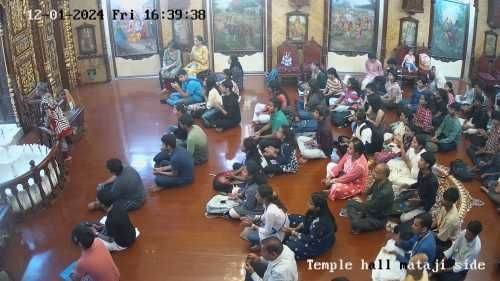

In [66]:
Image.open(image_path)

'templeCam-23_2024-01-12 06_09_49 AM.jpg'

In [75]:
annotation = json.loads(open(os.path.join(os.path.dirname(os.path.dirname(image_path)), "annotations", os.path.basename(image_path)[:-4]+".json")).read())

In [83]:
image = cv2.imread(image_path)
for box, class_id in zip(annotation['bboxes'], annotation['class_ids']):

    startX, startY, endX, endY = box
    
    bg_color = get_color_from_id(class_id+1)
    text_color = isLightOrDark(bg_color)
    class_name = metadata["classes"][class_id]

    cv2.rectangle(image, (startX, startY), (endX, endY), bg_color, 1)
    draw_bb_text(image,f" {class_name} ", (startX, startY, endX, endY),cv2.FONT_HERSHEY_DUPLEX, 0.3, text_color, 1, bg_color)


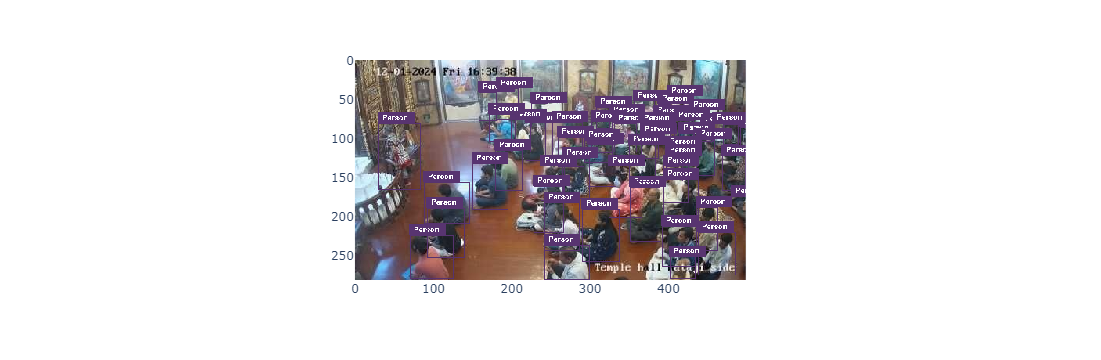

In [84]:
px.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [117]:
data_dir = r"D:\Applications\ZELLA\backend\workdir\cifar10_train"

In [118]:
os.listdir(data_dir)

['bird',
 'car',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'plane',
 'ship',
 'truck']

In [116]:
for class_name in os.listdir(data_dir):
    class_data_dir = os.path.join(data_dir, class_name)
    for x in os.listdir(class_data_dir):
        if ".ipynb_checkpoints" in x:
            print(x)

In [4]:
from initials import *



Logging Resourse Usage - before any initializations
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - before any initializations




2024-10-13 13:12:46,216 - p11696 {initials.py:231} - INFO - Check 1
2024-10-13 13:12:46,219 - p11696 {initials.py:242} - INFO - Check 2
2024-10-13 13:12:46,219 - p11696 {initials.py:248} - INFO - Check 3
2024-10-13 13:12:46,289 - p11696 {initials.py:262} - INFO - Choosen Device : cuda:0
2024-10-13 13:12:46,289 - p11696 {initials.py:269} - INFO - Check 4
2024-10-13 13:12:46,290 - p11696 {initials.py:446} - INFO - Check 6
2024-10-13 13:12:46,290 - p11696 {initials.py:550} - INFO - Check 8
2024-10-13 13:12:46,290 - p11696 {initials.py:623} - INFO - Check 9
2024-10-13 13:12:46,291 - p11696 {initials.py:675} - INFO - Check 10




Logging Resourse Usage - after all library initializations
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - after all library initializations


current process name : MainProcess
CPU Count : 16
GPU 0: 0 MiB / 6144 MiB
Choosen Device : cuda:0


Logging Resourse Usage - end of initials.py
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - end of initials.py




In [1]:
import segmentation_models as sm
import segmentation_models_pytorch as smp
import albumentations as A
from albumentations.pytorch import ToTensorV2

Segmentation Models: using `keras` framework.


In [7]:
model = smp.create_model(
    arch="LinkNet",                     # name of the architecture, e.g. 'Unet'/ 'FPN' / etc. Case INsensitive!
    encoder_name="resnet18",
    encoder_weights=None,
    in_channels=3,
    classes=3,
)

In [8]:
model

Linknet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [6]:
pd.DataFrame(mongodb["projects"].find({}))

,_id,project_id,user_id,project_name,project_type,project_dir,project_creation_time,project_creation_time_str
0,99782a7a-bc27-487f-b472-275724bbfa80_cddc7182,cddc7182,99782a7a-bc27-487f-b472-275724bbfa80,Test Project,Image Classification,workdir\99782a7a-bc27-487f-b472-275724bbfa80\T...,2024-09-24 13:08:12.240,2024-09-24 01:08:12 PM
1,99782a7a-bc27-487f-b472-275724bbfa80_5b9ce442,5b9ce442,99782a7a-bc27-487f-b472-275724bbfa80,Test OD Project,Object Detection,workdir\99782a7a-bc27-487f-b472-275724bbfa80\T...,2024-10-02 12:15:49.481,2024-10-02 12:15:49 PM
2,99782a7a-bc27-487f-b472-275724bbfa80_0581fad0,0581fad0,99782a7a-bc27-487f-b472-275724bbfa80,Project 2,Image Classification,workdir\99782a7a-bc27-487f-b472-275724bbfa80\P...,2024-10-02 19:38:46.747,2024-10-02 07:38:46 PM
3,99782a7a-bc27-487f-b472-275724bbfa80_2e62b30a,2e62b30a,99782a7a-bc27-487f-b472-275724bbfa80,KITTI-Test,Object Detection,workdir\99782a7a-bc27-487f-b472-275724bbfa80\K...,2024-10-11 11:50:41.013,2024-10-11 11:50:41 AM
4,99782a7a-bc27-487f-b472-275724bbfa80_44770989,44770989,99782a7a-bc27-487f-b472-275724bbfa80,CIFAR10-TEST,Image Classification,workdir\99782a7a-bc27-487f-b472-275724bbfa80\C...,2024-10-11 11:52:33.379,2024-10-11 11:52:33 AM
5,99782a7a-bc27-487f-b472-275724bbfa80_806a0bf2,806a0bf2,99782a7a-bc27-487f-b472-275724bbfa80,Cityscapes-Project,Semantic Segmentation,workdir\99782a7a-bc27-487f-b472-275724bbfa80\C...,2024-10-11 18:38:55.961,2024-10-11 06:38:55 PM
6,99782a7a-bc27-487f-b472-275724bbfa80_28ab2f2d,28ab2f2d,99782a7a-bc27-487f-b472-275724bbfa80,Cityscapes-Project-1,Semantic Segmentation,workdir\99782a7a-bc27-487f-b472-275724bbfa80\C...,2024-10-13 04:06:15.231,2024-10-13 04:06:15 AM


In [7]:
user_email = "sachin@gmail.com"
user_data = mongodb['users'].find_one({'email' : user_email})
user_id = user_data["_id"]

run_name = "Test RUN 1"
train_data_name = "cityscapes-train"
val_data_name = "cityscapes-val"
project_name = "Cityscapes-Project"
user_id = user_id
model_family = "YOLOv8"
model_name = "yolov8s"
training_mode = "scratch"
batch_size = 32
num_epochs = 50
learning_rate = 0.001
device = "cuda" if torch.cuda.is_available() else "cpu"

project_info = mongodb["projects"].find_one({'user_id' : user_id, 'project_name' : project_name})
project_type = project_info['project_type']

train_data_meta = mongodb["datasets"].find_one({'user_id' : user_id, 'project_name' : project_name, "data_name" : train_data_name})
train_data_path = train_data_meta['data_extracted_path']

val_data_meta = mongodb["datasets"].find_one({'user_id' : user_id, 'project_name' : project_name, "data_name" : val_data_name})
val_data_path = val_data_meta['data_extracted_path']

In [8]:
train_data_path

'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Cityscapes-Project\\data_38c041b5_extracted'

In [9]:
val_data_path

'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Cityscapes-Project\\data_f9c7c06a_extracted'

In [13]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import json
import copy


class SegmentationDataset(Dataset):
    def __init__(self, images_dir, annotations_dir, transform=None):
        self.images_dir = images_dir
        self.annotations_dir = annotations_dir
        self.transform = transform
        
        self.image_filenames = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
        
        with open(os.path.join(images_dir, '../metadata.json'), 'r') as f:
            self.metadata = json.load(f)
        self.classes = self.metadata["classes"]
        
    def __len__(self):
        return len(self.image_filenames)
    
    def __getitem__(self, idx):
        # Load the image
        image_path = os.path.join(self.images_dir, self.image_filenames[idx])
        image = Image.open(image_path).convert('RGB')  # Convert image to RGB

        # Load the segmentation map (npy)
        mask_filename = os.path.splitext(self.image_filenames[idx])[0] + '.npy'
        mask_path = os.path.join(self.annotations_dir, mask_filename)
        mask = np.load(mask_path)
        
        # Handle the transformation (if any)
        if self.transform:
            augmented = self.transform(image=np.array(image), mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        # No need to manually transpose the image here
        # Convert directly to tensor (ToTensorV2 already handles this)
        image = image.float()#astype(np.float32)  # Ensure float32
        mask = torch.as_tensor(mask, dtype=torch.long).clone().detach()   # Segmentation map as long tensor

        return image, mask


In [146]:


def validate_model(model, dataloader, loss_fn, device, classnames):
    num_classes = len(classnames)
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    iou_metric_val = 0.0
    iou_per_class = torch.zeros(num_classes).to(device)  # To store IoU for each class

    total_tp = 0
    n_pixels = 0
    n_samples = 0
    classwise_pixels = {class_name: {"TP": 0, "FP": 0, "FN": 0, "precision" : 0, "recall" : 0, "IoU" : 0} for class_name in classnames}

    with torch.no_grad():  # Disable gradient computation for validation
        for images, masks in tqdm(dataloader):
            n_samples += images.shape[0]
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, masks)
            if loss_fn is not None:
                val_loss += loss.item()

            # Compute IoU for each class
            preds = torch.argmax(outputs, dim=1)

            total_tp += int(torch.sum(preds == masks))
            n_pixels += masks.shape[0] * masks.shape[1] * masks.shape[2]

            for class_name in classnames:
                c = classnames.index(class_name)
                # For each class, calculate TP, FP, FN for IoU
                pred_c = (preds == c)
                mask_c = (masks == c)

                TP = torch.sum(pred_c & mask_c).item()
                FP = torch.sum(pred_c & ~mask_c).item()
                FN = torch.sum(~pred_c & mask_c).item()

                classwise_pixels[class_name]["TP"] += TP
                classwise_pixels[class_name]["FP"] += FP
                classwise_pixels[class_name]["FN"] += FN

    if loss_fn is not None:
        avg_val_loss = val_loss / len(dataloader)

    # Print detailed evaluation report
    for class_name in classnames:
        tp = classwise_pixels[class_name]["TP"]
        fp = classwise_pixels[class_name]["FP"]
        fn = classwise_pixels[class_name]["FN"]

        precision = tp / (tp + fp + 1e-6)
        recall = tp / (tp + fn + 1e-6)
        iou = tp / (tp + fp + fn + 1e-6)

        classwise_pixels[class_name]["precision"] = precision
        classwise_pixels[class_name]["recall"] = iou
        classwise_pixels[class_name]["IoU"] = iou

        classwise_pixels[class_name]["class_name"] = class_name
        

        # print(f"Class {class_name}:")
        # print(f"  Precision: {precision:.4f}, Recall: {recall:.4f}, IoU: {iou:.4f}")
    classwise_pixels["average"] = {}
    classwise_pixels["overall"] = {}
    
    # classwise_pixels["average"]["TP"] = int(np.mean([classwise_pixels[class_name]["TP"] for class_name in classnames]))
    # classwise_pixels["average"]["FP"] = int(np.mean([classwise_pixels[class_name]["FP"] for class_name in classnames]))
    # classwise_pixels["average"]["FN"] = int(np.mean([classwise_pixels[class_name]["FN"] for class_name in classnames]))
    classwise_pixels["average"]["precision"] = round(float(np.mean([classwise_pixels[class_name]["precision"] for class_name in classnames])), 4)
    classwise_pixels["average"]["recall"] = round(float(np.mean([classwise_pixels[class_name]["recall"] for class_name in classnames])), 4)
    classwise_pixels["average"]["IoU"] = round(float(np.mean([classwise_pixels[class_name]["IoU"] for class_name in classnames])), 4)
    classwise_pixels["average"]["class_name"] = "average"
    
    # classwise_pixels["overall"]["TP"] = int(np.sum([classwise_pixels[class_name]["TP"] for class_name in classnames]))
    # classwise_pixels["overall"]["FP"] = int(np.sum([classwise_pixels[class_name]["FP"] for class_name in classnames]))
    # classwise_pixels["overall"]["FN"] = int(np.sum([classwise_pixels[class_name]["FN"] for class_name in classnames]))
    # classwise_pixels["overall"]["precison"] = round(float(tp / (tp + fp + 1e-6)), 4)
    # classwise_pixels["overall"]["recall"] = round(float(tp / (tp + fn + 1e-6)), 4)
    classwise_pixels["overall"]["IoU"] = round(float(total_tp / (n_pixels + 1e-6)), 4)
    classwise_pixels["overall"]["class_name"] = "overall"

    classwise_records = [{"class_name" : classwise_pixels[x]["class_name"], **classwise_pixels[x]} for x in classwise_pixels.keys()]
    


    return avg_val_loss, classwise_records, classwise_pixels["average"]["IoU"], classwise_pixels["overall"]["IoU"]



def train_model_with_validation(
    model, 
    train_dataloader, 
    val_dataloader, 
    optimizer, 
    loss_fn, 
    device, 
    num_epochs=10,
    classnames=None
):
    
    num_classes = len(classnames)
    model.to(device)
    best_model_wts = copy.deepcopy(model.state_dict())
    best_iou = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 20)

        # Training phase
        epoch_loss = 0.0
        iou_metric_train = 0.0
        n_samples = 0

        total_tp = 0
        n_pixels = 0

        count = 0
        for images, masks in tqdm(train_dataloader):

            model.train()
        
            n_samples += images.shape[0]
            images = images.to(device)
            masks = masks.to(device)

            # print(f"Image shape before passing to the model: {images.shape}")

            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, masks)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            # Compute IoU
            preds = torch.argmax(outputs, dim=1)

            total_tp += int(torch.sum(preds == masks))
            n_pixels += int(masks.shape[0] * masks.shape[1] * masks.shape[2])
            
            # print(f"masks.shape : {masks.shape}, preds.shape : {preds.shape}, preds & masks : {(preds & masks).shape}, total_tp : {total_tp}, n_pixels : {n_pixels}")
            
            # iou_metric_train += total_tp / n_pixels
            
            # iou_metric_train += iou_metric(preds, masks).item()

            # if count > 10:
            #     break

            count += 1

        avg_train_loss = epoch_loss / len(train_dataloader)
        avg_train_iou = total_tp / n_pixels
        
        print(f"Training Loss: {avg_train_loss:.4f}, Training IoU: {avg_train_iou:.4f}")

        # Validation phase
        avg_val_loss, classwise_records, average_iou, overall_iou = validate_model(model, val_dataloader, loss_fn, device, classnames)
        
        print(f"Validation Loss: {avg_val_loss:.4f}, Validation Average IoU: {average_iou:.4f}, Validation Overall IoU: {overall_iou:.4f}")
        print(f"Validation IoU per class: \n")
        print(pd.DataFrame(classwise_records).set_index("class_name"))

        # Save the best model
        if average_iou > best_iou:
            best_iou = average_iou
            best_model_wts = copy.deepcopy(model.state_dict())

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    return model



In [1]:
ToTensorV2

NameError: name 'ToTensorV2' is not defined

In [134]:

# Define transformations
transform = A.Compose([
    A.Resize(256, 256),  # Resize to ensure height and width are divisible by 32
    A.HorizontalFlip(p=0.5),  # Optional: Random horizontal flip for augmentation
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # Normalization
    ToTensorV2()  # Convert to PyTorch tensor (with correct shape)
])

# Device (use GPU if available)
# device = torch.device("cuda" if torch.cuda.is_available() else "CPU")
device = torch.device("cpu")


# Prepare train and validation dataloaders
train_images_dir = os.path.join(train_data_path, 'images')
train_annotations_dir = os.path.join(train_data_path, 'annotations')
val_images_dir = os.path.join(val_data_path, 'images')
val_annotations_dir = os.path.join(val_data_path, 'annotations')

train_dataset = SegmentationDataset(train_images_dir, train_annotations_dir, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

val_dataset = SegmentationDataset(val_images_dir, val_annotations_dir, transform=transform)
val_dataloader = DataLoader(val_dataset, batch_size=2, shuffle=True)



In [135]:
for images, masks in train_dataloader:
    break

In [136]:
images.shape

torch.Size([2, 3, 256, 256])

In [137]:
masks.shape

torch.Size([2, 256, 256])

In [138]:
train_dataset[0][0].shape

torch.Size([3, 256, 256])

In [2]:
1e-4

0.0001

In [139]:

# Set up the model, loss function, and metrics
model = smp.Unet(
    encoder_name="resnet18",
    encoder_weights="imagenet",
    in_channels=3,
    classes=len(train_dataset.classes)
)

loss_fn = smp.losses.DiceLoss(mode='multiclass')#+ torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


# Train and validate the model
best_model = train_model_with_validation(
    model,
    train_dataloader,
    val_dataloader,
    optimizer,
    loss_fn,
    device,
    num_epochs=10,
    classnames=train_dataset.classes
)


avg_val_loss, classwise_records, average_iou, overall_iou = validate_model(best_model, val_dataloader, loss_fn, device, train_dataset.classes)

print(f"Validation Loss: {avg_val_loss:.4f}, Validation Average IoU: {average_iou:.4f}, Validation Overall IoU: {overall_iou:.4f}")
print(f"Validation IoU per class: \n")
print(pd.DataFrame(classwise_records).set_index("class_name"))


# Final evaluation with the best model


Epoch 1/10
--------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:45<00:00,  2.11it/s]


Training Loss: 0.4872, Training IoU: 0.7627


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:44<00:00,  5.65it/s]


Validation Loss: 0.4394, Validation Average IoU: 0.3145, Validation Overall IoU: 0.8227
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2660536.0    86239.0  1706600.0   0.968604  0.597420  0.597420
road           10139202.0   962868.0   548976.0   0.913271  0.870240  0.870240
sidewalk        1119306.0   639159.0   416288.0   0.636524  0.514682  0.514682
building        5609047.0  1796192.0   616949.0   0.757443  0.699192  0.699192
wall                  1.0      138.0   208047.0   0.007194  0.000005  0.000005
fence             11214.0   140869.0   222096.0   0.073736  0.029970  0.029970
pole              35048.0   202544.0   385538.0   0.147513  0.056245  0.056245
traffic light      2961.0    32758.0    52787.0   0.082897  0.033455  0.033455
traffic sign      45540.0    69017.0   143460.0   0.397531  0.176500  0.176500
vegetation     

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:46<00:00,  2.11it/s]


Training Loss: 0.3882, Training IoU: 0.8253


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:44<00:00,  5.64it/s]


Validation Loss: 0.4085, Validation Average IoU: 0.3447, Validation Overall IoU: 0.8142
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2781432.0    98087.0  1585704.0   0.965936  0.622910  0.622910
road           10003198.0   689527.0   684980.0   0.935514  0.879193  0.879193
sidewalk        1211527.0   795995.0   324067.0   0.603494  0.519614  0.519614
building        5459854.0  1570625.0   766142.0   0.776598  0.700285  0.700285
wall              48962.0   203042.0   159086.0   0.194291  0.119103  0.119103
fence             80578.0   902425.0   152732.0   0.081971  0.070948  0.070948
pole             116151.0   543936.0   304435.0   0.175963  0.120423  0.120423
traffic light     17086.0    44070.0    38662.0   0.279384  0.171172  0.171172
traffic sign      67550.0    94850.0   121450.0   0.415948  0.237978  0.237978
vegetation     

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:47<00:00,  2.10it/s]


Training Loss: 0.3619, Training IoU: 0.8365


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:43<00:00,  5.69it/s]


Validation Loss: 0.3963, Validation Average IoU: 0.3498, Validation Overall IoU: 0.8100
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2687388.0    25808.0  1679748.0   0.990488  0.611751  0.611751
road           10240548.0   948680.0   447630.0   0.915215  0.880010  0.880010
sidewalk        1083748.0   533678.0   451846.0   0.670045  0.523734  0.523734
building        5632172.0  1703232.0   593824.0   0.767807  0.710305  0.710305
wall              90680.0   459720.0   117368.0   0.164753  0.135796  0.135796
fence             57705.0   819180.0   175605.0   0.065807  0.054827  0.054827
pole             118225.0   331711.0   302361.0   0.262760  0.157152  0.157152
traffic light     18087.0    28360.0    37661.0   0.389412  0.215045  0.215045
traffic sign      67526.0    71105.0   121474.0   0.487092  0.259611  0.259611
vegetation     

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:46<00:00,  2.11it/s]


Training Loss: 0.3463, Training IoU: 0.8415


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:44<00:00,  5.67it/s]


Validation Loss: 0.3755, Validation Average IoU: 0.3808, Validation Overall IoU: 0.8331
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2764922.0    54918.0  1602214.0   0.980524  0.625257  0.625257
road           10324970.0   958329.0   363208.0   0.915067  0.886529  0.886529
sidewalk        1038055.0   359219.0   497539.0   0.742914  0.547840  0.547840
building        5521354.0  1272301.0   704642.0   0.812722  0.736348  0.736348
wall              82047.0   272917.0   126001.0   0.231142  0.170588  0.170588
fence             48156.0   292429.0   185154.0   0.141392  0.091597  0.091597
pole             130520.0   279959.0   290066.0   0.317970  0.186312  0.186312
traffic light     22514.0    53464.0    33234.0   0.296323  0.206150  0.206150
traffic sign      91938.0   130852.0    97062.0   0.412667  0.287439  0.287439
vegetation     

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:45<00:00,  2.11it/s]


Training Loss: 0.3313, Training IoU: 0.8459


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:43<00:00,  5.72it/s]


Validation Loss: 0.3620, Validation Average IoU: 0.3935, Validation Overall IoU: 0.8350
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2769375.0    35986.0  1597761.0   0.987172  0.628957  0.628957
road           10310848.0   904286.0   377330.0   0.919369  0.889444  0.889444
sidewalk        1119410.0   468338.0   416184.0   0.705030  0.558607  0.558607
building        5423752.0  1068092.0   802244.0   0.835472  0.743582  0.743582
wall             102875.0   338969.0   105173.0   0.232831  0.188065  0.188065
fence             58073.0   332294.0   175237.0   0.148765  0.102674  0.102674
pole             148929.0   336550.0   271657.0   0.306767  0.196700  0.196700
traffic light     19281.0    27713.0    36467.0   0.410286  0.231018  0.231018
traffic sign      81233.0    78873.0   107767.0   0.507370  0.303252  0.303252
vegetation     

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:45<00:00,  2.11it/s]


Training Loss: 0.3228, Training IoU: 0.8494


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:44<00:00,  5.64it/s]


Validation Loss: 0.3630, Validation Average IoU: 0.4007, Validation Overall IoU: 0.8388
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2789093.0    48296.0  1578043.0   0.982979  0.631669  0.631669
road           10314621.0   921519.0   373557.0   0.917986  0.888449  0.888449
sidewalk        1081675.0   363214.0   453919.0   0.748622  0.569660  0.569660
building        5653408.0  1418133.0   572588.0   0.799459  0.739575  0.739575
wall              49273.0    92554.0   158775.0   0.347416  0.163914  0.163914
fence             58044.0   221972.0   175266.0   0.207288  0.127490  0.127490
pole             130366.0   202231.0   290220.0   0.391964  0.209317  0.209317
traffic light     24256.0    49366.0    31492.0   0.329467  0.230759  0.230759
traffic sign      78152.0    47139.0   110848.0   0.623764  0.330958  0.330958
vegetation     

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:47<00:00,  2.10it/s]


Training Loss: 0.3169, Training IoU: 0.8542


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:44<00:00,  5.67it/s]


Validation Loss: 0.3574, Validation Average IoU: 0.4027, Validation Overall IoU: 0.8407
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2797608.0    81414.0  1569528.0   0.971722  0.628881  0.628881
road           10267341.0   897648.0   420837.0   0.919602  0.886198  0.886198
sidewalk        1102365.0   450625.0   433229.0   0.709834  0.555007  0.555007
building        5396727.0  1036960.0   829269.0   0.838823  0.743048  0.743048
wall              49434.0    85720.0   158614.0   0.365761  0.168276  0.168276
fence             38262.0   124165.0   195048.0   0.235564  0.107034  0.107034
pole             142969.0   241550.0   277617.0   0.371813  0.215921  0.215921
traffic light     21249.0    32391.0    34499.0   0.396141  0.241085  0.241085
traffic sign     103737.0   174420.0    85263.0   0.372944  0.285447  0.285447
vegetation     

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:47<00:00,  2.10it/s]


Training Loss: 0.3095, Training IoU: 0.8565


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:43<00:00,  5.71it/s]


Validation Loss: 0.3538, Validation Average IoU: 0.4134, Validation Overall IoU: 0.8392
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2817614.0    84279.0  1549522.0   0.970957  0.632970  0.632970
road           10350416.0  1064073.0   337762.0   0.906779  0.880718  0.880718
sidewalk        1063397.0   402245.0   472197.0   0.725550  0.548754  0.548754
building        5599841.0  1223378.0   626155.0   0.820704  0.751720  0.751720
wall              62588.0    92354.0   145460.0   0.403945  0.208347  0.208347
fence             69473.0   251226.0   163837.0   0.216630  0.143380  0.143380
pole             135581.0   180514.0   285005.0   0.428925  0.225555  0.225555
traffic light     23997.0    38056.0    31751.0   0.386718  0.255821  0.255821
traffic sign      92245.0    74162.0    96755.0   0.554334  0.350526  0.350526
vegetation     

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:48<00:00,  2.10it/s]


Training Loss: 0.3055, Training IoU: 0.8591


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:44<00:00,  5.64it/s]


Validation Loss: 0.3477, Validation Average IoU: 0.4214, Validation Overall IoU: 0.8426
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2799501.0    48948.0  1567635.0   0.982816  0.633933  0.633933
road           10325576.0   878590.0   362602.0   0.921584  0.892693  0.892693
sidewalk        1163997.0   498361.0   371597.0   0.700208  0.572283  0.572283
building        5513465.0  1059765.0   712531.0   0.838776  0.756745  0.756745
wall              95579.0   272569.0   112469.0   0.259621  0.198867  0.198867
fence             59076.0   236385.0   174234.0   0.199945  0.125775  0.125775
pole             134669.0   182493.0   285917.0   0.424606  0.223302  0.223302
traffic light     18643.0    15166.0    37105.0   0.551421  0.262896  0.262896
traffic sign      77041.0    38726.0   111959.0   0.665483  0.338306  0.338306
vegetation     

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1488/1488 [11:47<00:00,  2.10it/s]


Training Loss: 0.2982, Training IoU: 0.8606


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:44<00:00,  5.68it/s]


Validation Loss: 0.3516, Validation Average IoU: 0.4252, Validation Overall IoU: 0.8428
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2810198.0    71573.0  1556938.0   0.975164  0.633112  0.633112
road           10280103.0   803659.0   408075.0   0.927492  0.894557  0.894557
sidewalk        1136917.0   489427.0   398677.0   0.699063  0.561435  0.561435
building        5574999.0  1186275.0   650997.0   0.824549  0.752131  0.752131
wall              96193.0   171344.0   111855.0   0.359550  0.253545  0.253545
fence             57450.0   226426.0   175860.0   0.202377  0.124963  0.124963
pole             136942.0   174192.0   283644.0   0.440138  0.230241  0.230241
traffic light     20622.0    17124.0    35126.0   0.546336  0.282989  0.282989
traffic sign      83178.0    42696.0   105822.0   0.660804  0.358996  0.358996
vegetation     

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:43<00:00,  5.70it/s]

Validation Loss: 0.3493, Validation Average IoU: 0.4255, Validation Overall IoU: 0.8441
Validation IoU per class: 

                       TP         FP         FN  precision    recall       IoU
class_name                                                                    
Background      2810158.0    69889.0  1556978.0   0.975733  0.633343  0.633343
road           10289577.0   809848.0   398601.0   0.927037  0.894899  0.894899
sidewalk        1140661.0   477702.0   394933.0   0.704824  0.566564  0.566564
building        5590625.0  1209324.0   635371.0   0.822157  0.751901  0.751901
wall              81959.0   164228.0   126089.0   0.332914  0.220157  0.220157
fence             59082.0   225377.0   174228.0   0.207700  0.128807  0.128807
pole             135007.0   173128.0   285579.0   0.438142  0.227394  0.227394
traffic light     19502.0    16428.0    36246.0   0.542778  0.270201  0.270201
traffic sign      82442.0    44099.0   106558.0   0.651504  0.353678  0.353678
vegetation     

In [147]:
avg_val_loss, classwise_records, average_iou, overall_iou = validate_model(best_model, val_dataloader, loss_fn, device, train_dataset.classes)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:43<00:00,  5.77it/s]


In [150]:
classwise_records

[{'class_name': 'Background',
  'TP': 2809421,
  'FP': 71629,
  'FN': 1557715,
  'precision': 0.9751378837573194,
  'recall': 0.6329285285432698,
  'IoU': 0.6329285285432698},
 {'class_name': 'road',
  'TP': 10268099,
  'FP': 803318,
  'FN': 420079,
  'precision': 0.9274421693265706,
  'recall': 0.8935389265243713,
  'IoU': 0.8935389265243713},
 {'class_name': 'sidewalk',
  'TP': 1142498,
  'FP': 499651,
  'FN': 393096,
  'precision': 0.6957334565860371,
  'recall': 0.5613564951636971,
  'IoU': 0.5613564951636971},
 {'class_name': 'building',
  'TP': 5575107,
  'FP': 1186569,
  'FN': 650889,
  'precision': 0.8245155491033843,
  'recall': 0.7521157655952087,
  'IoU': 0.7521157655952087},
 {'class_name': 'wall',
  'TP': 91715,
  'FP': 174684,
  'FN': 116333,
  'precision': 0.34427681785463055,
  'recall': 0.2396324320928492,
  'IoU': 0.2396324320928492},
 {'class_name': 'fence',
  'TP': 58155,
  'FP': 225868,
  'FN': 175155,
  'precision': 0.20475454452560266,
  'recall': 0.1266502315003

In [149]:
pd.DataFrame(classwise_records)

,class_name,TP,FP,FN,precision,recall,IoU
0,Background,2809421.0,71629.0,1557715.0,0.975138,0.632929,0.632929
1,road,10268099.0,803318.0,420079.0,0.927442,0.893539,0.893539
2,sidewalk,1142498.0,499651.0,393096.0,0.695733,0.561356,0.561356
3,building,5575107.0,1186569.0,650889.0,0.824516,0.752116,0.752116
4,wall,91715.0,174684.0,116333.0,0.344277,0.239632,0.239632
5,fence,58155.0,225868.0,175155.0,0.204755,0.126650,0.126650
6,pole,137245.0,175334.0,283341.0,0.439073,0.230308,0.230308
7,traffic light,19766.0,17157.0,35982.0,0.535330,0.271120,0.271120
8,traffic sign,83691.0,43302.0,105309.0,0.659021,0.360268,0.360268
9,vegetation,4276723.0,430769.0,643803.0,0.908493,0.799194,0.799194


In [126]:
json.dumps(classwise_records)

'[{"TP": 198337, "FP": 658099, "FN": 4168799, "precision": 0.23158414639245478, "recall": 0.039468203974532635, "IoU": 0.039468203974532635, "class_name": "Background"}, {"TP": 3323564, "FP": 1306268, "FN": 7364614, "precision": 0.7178584449714983, "recall": 0.2770919140408588, "IoU": 0.2770919140408588, "class_name": "road"}, {"TP": 853185, "FP": 4469473, "FN": 682409, "precision": 0.16029303404423872, "recall": 0.14207751553810438, "IoU": 0.14207751553810438, "class_name": "sidewalk"}, {"TP": 150698, "FP": 439543, "FN": 6075298, "precision": 0.2553160488677416, "recall": 0.02260852423187043, "IoU": 0.02260852423187043, "class_name": "building"}, {"TP": 198, "FP": 35040, "FN": 207850, "precision": 0.0056189341050678545, "recall": 0.0008145198446619556, "IoU": 0.0008145198446619556, "class_name": "wall"}, {"TP": 3277, "FP": 356000, "FN": 230033, "precision": 0.009121095978843285, "recall": 0.005560740527047631, "IoU": 0.005560740527047631, "class_name": "fence"}, {"TP": 21979, "FP": 13

In [ ]:


def final_evaluation(model, val_dataloader, iou_metric, device, num_classes):
    model.eval()
    iou_per_class = torch.zeros(num_classes).to(device)
    classwise_pixels = {i: {"TP": 0, "FP": 0, "FN": 0} for i in range(num_classes)}

    with torch.no_grad():
        for images, masks in tqdm(val_dataloader):
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images)
            predicted_masks = torch.argmax(outputs, dim=1)  # Get predicted class

            for c in range(num_classes):
                # For each class, calculate TP, FP, FN for IoU
                pred_c = (predicted_masks == c)
                mask_c = (masks == c)

                TP = torch.sum(pred_c & mask_c).item()
                FP = torch.sum(pred_c & ~mask_c).item()
                FN = torch.sum(~pred_c & mask_c).item()

                classwise_pixels[c]["TP"] += TP
                classwise_pixels[c]["FP"] += FP
                classwise_pixels[c]["FN"] += FN

    #             iou_per_class[c] += iou_metric(predicted_masks == c, masks == c).item()

    # avg_iou_per_class = iou_per_class / len(val_dataloader)

    # Print detailed evaluation report
    
    for c in range(num_classes):
        tp = classwise_pixels[c]["TP"]
        fp = classwise_pixels[c]["FP"]
        fn = classwise_pixels[c]["FN"]

        precision = tp / (tp + fp + 1e-6)
        recall = tp / (tp + fn + 1e-6)
        iou = tp / (tp + fp + fn + 1e-6)

        print(f"Class {c}:")
        print(f"  Precision: {precision:.4f}, Recall: {recall:.4f}, IoU: {iou:.4f}")
    
    print(f"Average IoU per class: {avg_iou_per_class}")

final_evaluation(best_model, val_dataloader, iou_metric, device, num_classes=len(train_dataset.classes))


In [ ]:
smp.metrics.iou_score()

In [11]:
train_dataset.classes

['road',
 'sidewalk',
 'building',
 'wall',
 'fence',
 'pole',
 'traffic light',
 'traffic sign',
 'vegetation',
 'terrain',
 'sky',
 'person',
 'rider',
 'car',
 'truck',
 'bus',
 'train',
 'motorcycle',
 'bicycle']

In [19]:
len(train_dataset.classes)

19